<a href="https://colab.research.google.com/github/Drnjenkins/praxis-2023/blob/main/Report_Classification_CV_Imbalanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# improt the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
# !pip install tabulate
from tabulate import tabulate
from tqdm.auto import tqdm

pd.set_option('display.max_columns', None)

# Ignore warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("labeled_foi_text_2023_05_01 (1).csv") # load the dataset

In [ ]:
df.head() # show top 5 rows

,ROW_ID,FOI_TEXT,PRIMARY_LABEL
0,1969025,IT WAS REPORTED THAT THE TRANSMITTER LOST CONN...,Quality Engineering
1,1426265,IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...,Quality Engineering
2,2609625,IT WAS REPORTED THAT TRANSMITTER FAILED ERROR ...,Quality Engineering
3,2813837,IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...,Quality Engineering
4,1337517,IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...,Quality Engineering


In [ ]:
print("Total Rows:", df.shape[0]) # check the shape of dataset
print("Total Columns:", df.shape[1])

Total Rows: 5692
Total Columns: 3


In [ ]:
print("Features: {}".format(df.columns.tolist())) # check the columns names inside the dataset

Features: ['ROW_ID', 'FOI_TEXT', 'PRIMARY_LABEL']


In [ ]:
print("Any Duplicated Values: {}".format(df.duplicated().any())) # check duplicated values

Any Duplicated Values: False


In [ ]:
df.info() # get general information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5692 entries, 0 to 5691
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ROW_ID         5692 non-null   int64 
 1   FOI_TEXT       5692 non-null   object
 2   PRIMARY_LABEL  5692 non-null   object
dtypes: int64(1), object(2)
memory usage: 133.5+ KB


In [ ]:
df.isnull().sum() # check missing values

ROW_ID           0
FOI_TEXT         0
PRIMARY_LABEL    0
dtype: int64

In [ ]:
def target_distribution(df_final, col):
    plt.figure(figsize=(17, 7))

    plt.subplot(1, 2, 1)

    ax = df_final[col].value_counts().plot(kind = 'bar', color = ['blue', 'green', 'red', 
                                                                  'purple', 'orange'])

    plt.xlabel('Score Category', fontsize=16)
    plt.ylabel('Frequency of Target', fontsize=16)
    plt.xticks(size = 12)
    plt.yticks(size = 12)
    plt.title('Frequency Distribution of Target', fontsize=18)
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.01), size=15)


    plt.subplot(1,2,2)

    df_final[col].value_counts().plot.pie(explode=[0.,0.1,0.1,0.1,0.5],autopct='%1.2f%%',shadow=False, colors = ['blue', 'green', 'red', 
                                                                                              'purple', 'orange'],
                                        textprops={'fontsize':15, 'color':'black'},
                                         startangle=20)
    plt.ylabel('target', fontsize=16)
    plt.title('Proportional Distribution of Target', fontsize=18)
    plt.show()

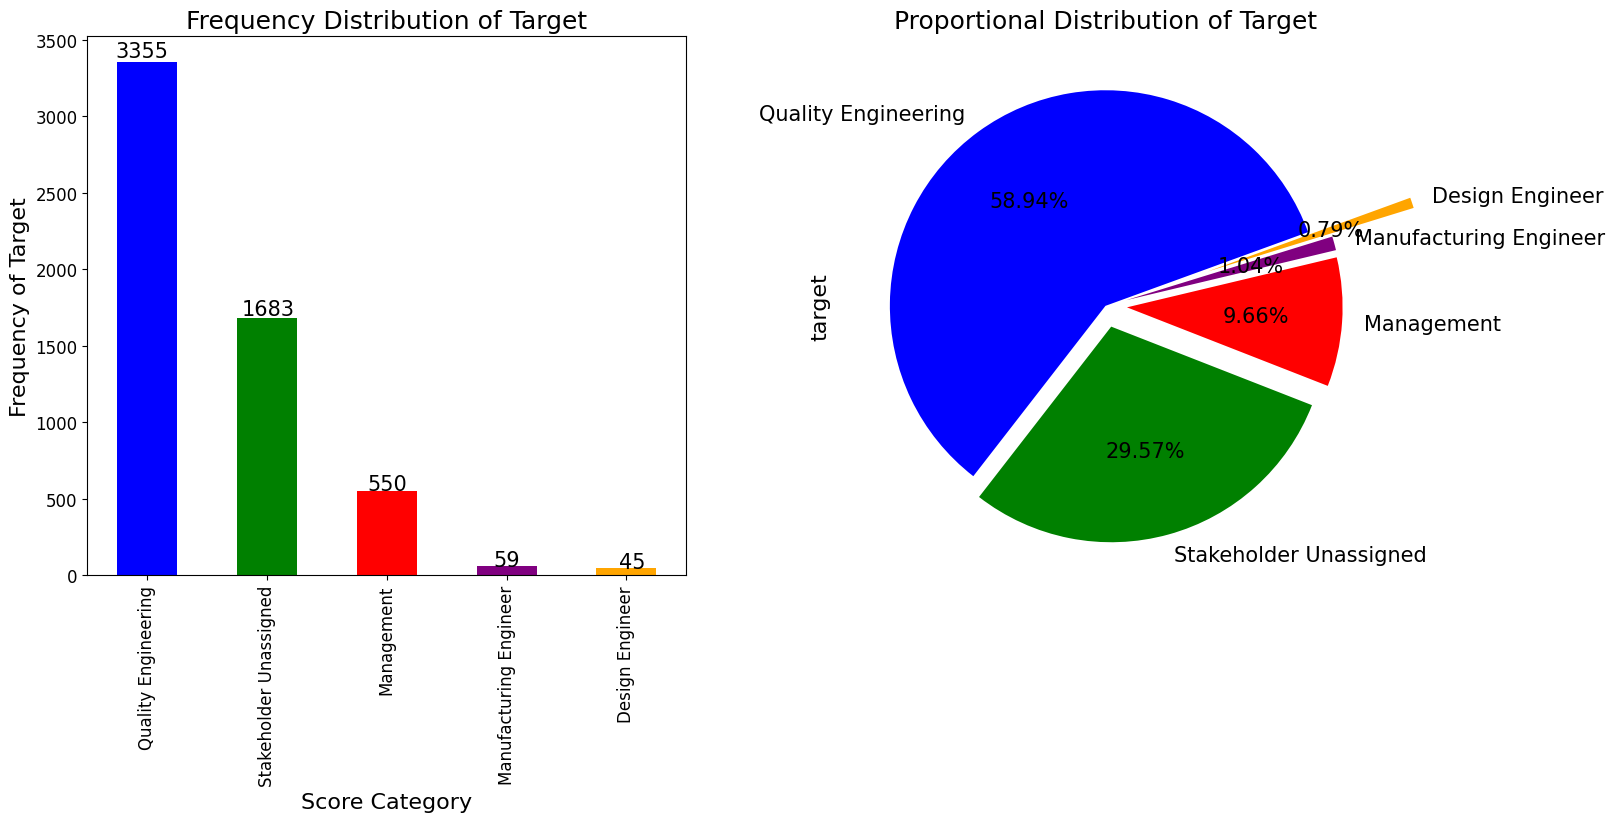

In [ ]:
target_distribution(df, 'PRIMARY_LABEL')

- From above, we can see the distribution of results in which our target feature is in imbalanced form.
- Clearly, we can see that our dataset is imbalanced form. Therefore, accuracy evaluation is not good when the dataset is in an imbalanced form, accuracy is biased on the majority class.
- We will check the different performance metrics Precision, Recall, and F1-score on testing data and see how models perform according to these performance metrics.

In [ ]:
df['text_length'] = df['FOI_TEXT'].apply(lambda x: len(x.split())) # get the length of text
df.head()

,ROW_ID,FOI_TEXT,PRIMARY_LABEL,text_length
0,1969025,IT WAS REPORTED THAT THE TRANSMITTER LOST CONN...,Quality Engineering,32
1,1426265,IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...,Quality Engineering,37
2,2609625,IT WAS REPORTED THAT TRANSMITTER FAILED ERROR ...,Quality Engineering,31
3,2813837,IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...,Quality Engineering,45
4,1337517,IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...,Quality Engineering,52


In [ ]:
print("Average Distribution of Number of Words: \t", int(df['text_length'].mean()))

Average Distribution of Number of Words: 	 43


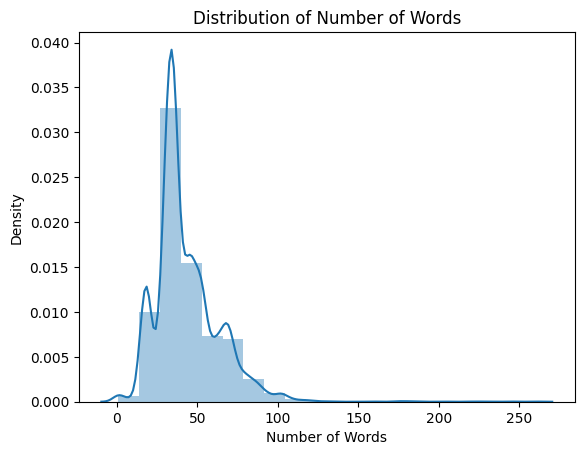

In [ ]:
ax = sns.distplot(df['text_length'], norm_hist = True, bins = 20)
plt.title(f'Distribution of Number of Words')
plt.xlabel('Number of Words')
plt.show()

In [ ]:
print("Average Text: ", int(np.mean(df['text_length'])), " Number of words")
print("Longest Text: ", max(df['text_length']), " Number of words")
print("Shortest Text: ", min(df['text_length']), " Number of word.")

Average Text:  43  Number of words
Longest Text:  260  Number of words
Shortest Text:  1  Number of word.


In [ ]:
df[df['text_length']==1]

,ROW_ID,FOI_TEXT,PRIMARY_LABEL,text_length
618,3265893,(B)(4),Stakeholder Unassigned,1
1342,2183359,(B)(4),Stakeholder Unassigned,1
1653,1937352,COM-(B)(4).,Quality Engineering,1
2827,1940488,COM-(B)(4).,Stakeholder Unassigned,1
2931,2040371,COM-(B)(4).,Stakeholder Unassigned,1
3010,3240092,COM-(B)(4).,Stakeholder Unassigned,1
3020,2937457,COM-(B)(4).,Stakeholder Unassigned,1
3042,3456855,COM-(B)(4).,Stakeholder Unassigned,1
3078,2936782,COM-(B)(4).,Stakeholder Unassigned,1
3171,3430034,(B(4).,Stakeholder Unassigned,1


In [ ]:
# !pip install WordCloud

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Average POSITIVE Review Stopword Ratio:	 0.39


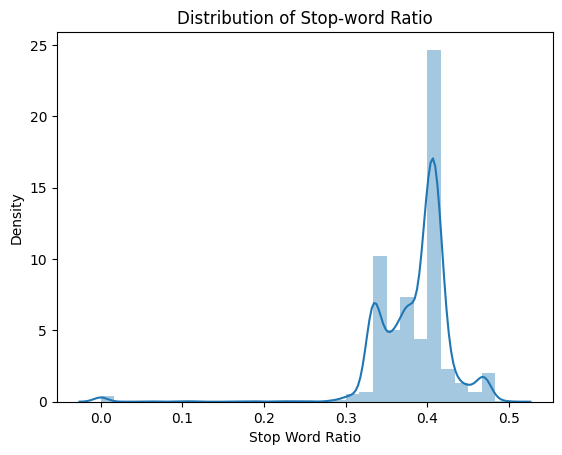

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
    
# function to calculate the stop words raion  
def stop_words_ratio(x):
    num_total_words = 0
    num_stop_words = 0
    for word in word_tokenize(x):
        if word.lower() in stop_words:
            num_stop_words += 1
        num_total_words += 1 
    return num_stop_words/num_total_words


stopwords = df.FOI_TEXT.apply(stop_words_ratio)


# plotting the distribution 
sns.distplot(stopwords, norm_hist = True, bins=30)
print("Average POSITIVE Review Stopword Ratio:\t", round(stopwords.values.mean(),2))
plt.title('Distribution of Stop-word Ratio')
plt.xlabel('Stop Word Ratio')
plt.show()

In [ ]:
# importing the NLP libraries that will be used for preprocessing
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud

from nltk.stem import PorterStemmer
ps = PorterStemmer() #creating an instance of the class

stopwords.words("english")[:10] # <-- import the english stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
def preprocess_text(text):
    """In preprocess_text function we will apply all the things that given below:
    - removing links
    - removing special characters
    - removing punctuations
    - removing numbers
    - removing stopwords
    - doing stemming
    - transforming in lowercase
    - removing excessive whitespaces
    """
    # remove links
    text = re.sub(r"http\S+", "", str(text))
    # remove special chars and numbers
    text = re.sub("[^A-Za-z]+", " ", str(text))
    # remove punctuations in string
    text = re.sub(r'[^\w\s]', "", str(text)) 
    # 1. tokenize
    tokens = nltk.word_tokenize(text)
    # 2. check if stopword and stemming the word
    tokens = [ps.stem(w) for w in tokens if not w.lower() in stopwords.words("english")]
    # 3. join back together
    text = " ".join(tokens)
    # return text in lower case and stripped of whitespaces
    text = text.lower().strip()
    return text

In [ ]:
df['clean_text'] = df['FOI_TEXT'].apply(lambda x: preprocess_text(x))
df.head()

,ROW_ID,FOI_TEXT,PRIMARY_LABEL,text_length,clean_text
0,1969025,IT WAS REPORTED THAT THE TRANSMITTER LOST CONN...,Quality Engineering,32,report transmitt lost connect pump greater hou...
1,1426265,IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...,Quality Engineering,37,report signal loss one hour occur product data...
2,2609625,IT WAS REPORTED THAT TRANSMITTER FAILED ERROR ...,Quality Engineering,31,report transmitt fail error occur data evalu a...
3,2813837,IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...,Quality Engineering,45,report signal loss one hour occur review share...
4,1337517,IT WAS REPORTED THAT SIGNAL LOSS OVER ONE HOUR...,Quality Engineering,52,report signal loss one hour occur product eval...


In [ ]:
# define a function for getting all words from the text
def returning_tokinize_list(df,column_name):
    df = df.reset_index(drop=True)  
    tokenize_list = [word_tokenize(df[column_name][i]) for i in range(df.shape[0])]
    final = [j for i in tokenize_list for j in i]
    return final     

In [ ]:
# get the all words of text into list
tokenize_list_words= returning_tokinize_list(df, 'clean_text')

In [ ]:
# function for words in dataframe format
def table_format(data_list,column_name):
    df_ = pd.DataFrame(data_list, columns = [column_name,'Frequency_distribution'])
    return df_

# function for extracting the most common words in reviews text
def most_common_words(cleaned_col_name_list,common_words = 10):
    fdist = FreqDist(cleaned_col_name_list)
    most_common=fdist.most_common(common_words)
    return most_common

In [ ]:
# draw a graph of word which are most common
def word_cloud(data):
    unique_string=(" ").join(data)
    wordcloud = WordCloud(width = 1000, height = 500,background_color = "white").generate(unique_string)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig("wordCloud"+".png", bbox_inches='tight')
    plt.show()
    plt.close()

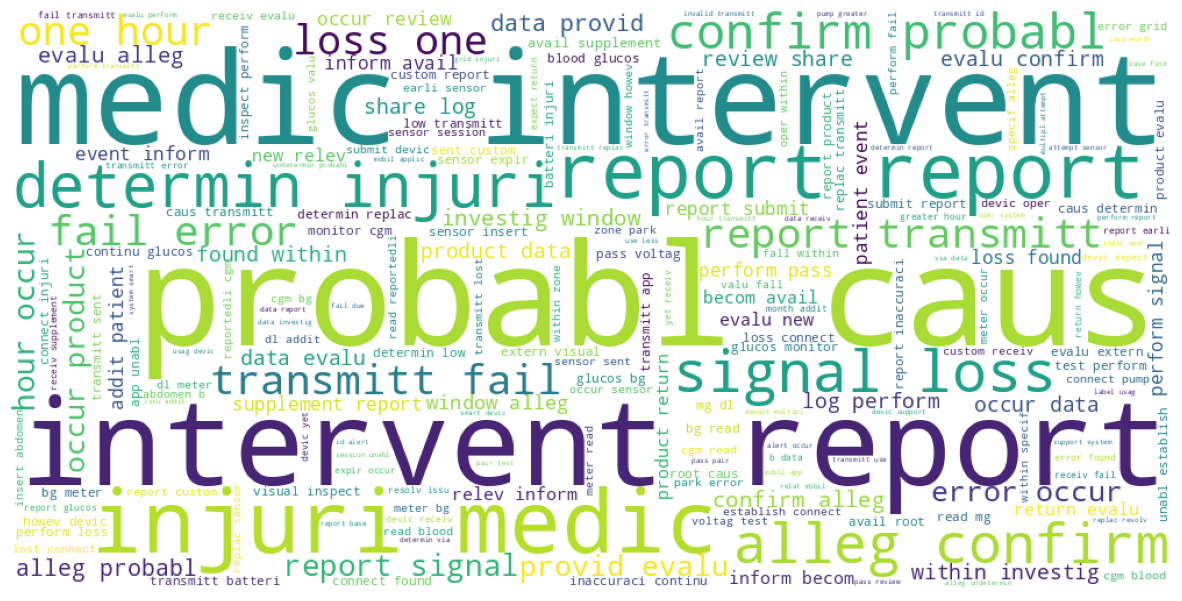

In [ ]:
# draw word cloud
word_cloud(tokenize_list_words)

In [ ]:
# lets try to check the 15 most common words
MCW = most_common_words(tokenize_list_words, common_words=15)
table_format(MCW, 'word')

,word,Frequency_distribution
0,report,10166
1,caus,4531
2,determin,4241
3,alleg,4002
4,probabl,3963
5,occur,3962
6,medic,3931
7,intervent,3922
8,injuri,3917
9,evalu,3906


In [ ]:
# Import classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

from sklearn.feature_extraction.text import TfidfVectorizer
import time

In [ ]:
label_enc = LabelEncoder()
df['PRIMARY_LABEL_ENC'] = label_enc.fit_transform(df['PRIMARY_LABEL'] )

In [ ]:
label_enc.classes_

array(['Design Engineer', 'Management', 'Manufacturing Engineer',
       'Quality Engineering', 'Stakeholder Unassigned'], dtype=object)

In [ ]:
X = df['clean_text'] # independent feature
y = df['PRIMARY_LABEL_ENC'] # dependent feature

In [ ]:
def splitting_dataset(X, y, test_size=0.25):
    from sklearn.model_selection import train_test_split
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0, stratify=y)

    # lets try to check the shape of training and testing
    print("training shape :",X_train.shape)
    print("testing shape :", X_test.shape)
    return X_train, X_test, y_train, y_test

In [ ]:
def get_features_from_text(X):
  # Fit and transform the data to a document-term matrix using TfidfVectorizer 
  tfidf = TfidfVectorizer(min_df=2)
  X_tfidf = tfidf.fit_transform(X.values)
  # X_test_tfidf = tfidf.transform(X_test.values)
  print ("Number of features TF-IDF: %d" %len(tfidf.get_feature_names_out()))

  # X_train_tfidf = X_train_tfidf.toarray()
  # X_test_tfidf = X_test_tfidf.toarray()
  # return X_train_tfidf, X_test_tfidf
  return X_tfidf.toarray()


In [ ]:
X_tfidff = get_features_from_text(X)

Number of features TF-IDF: 470


# Imbalanced-Dataset

**The problem of imbalanced dataset, the trained model are often biased towards majority class ,but examples from the minority class tend to be misclassified** <br>
**There are two options to deal with imbalanced datasets.Oversampling (incresaing the samples of minority class) or undersampling (decreasing the samples of majority class) depending on number of instances of each class**

## **Random oversampling - SMOTE**

In [ ]:
# !pip install imblearn
from imblearn.over_sampling import SMOTE

In [ ]:
oversample = SMOTE(random_state=42)
overX,overY=oversample.fit_resample(X_tfidff, y)

pd.DataFrame(overY)['PRIMARY_LABEL_ENC'].value_counts()

3    3355
4    3355
0    3355
1    3355
2    3355
Name: PRIMARY_LABEL_ENC, dtype: int64

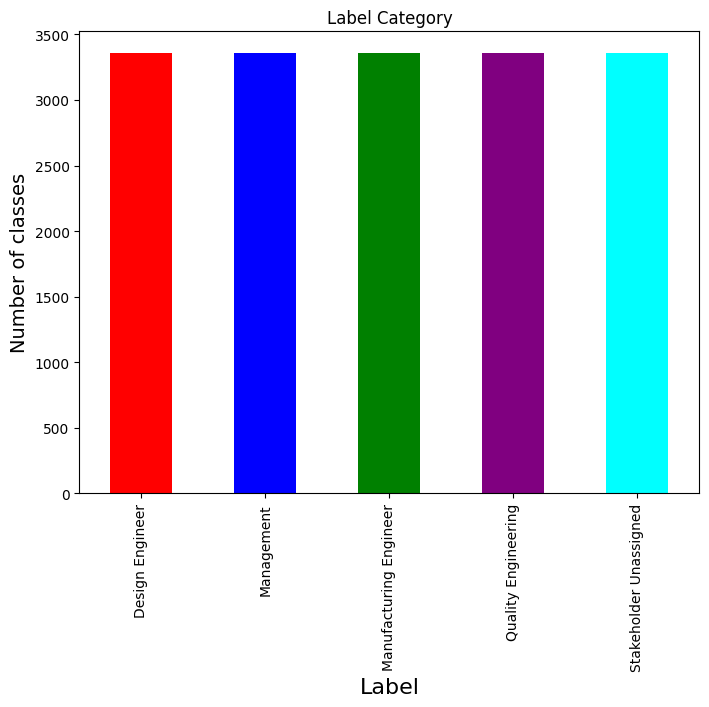

In [ ]:
# First over sampling to make all classes equal

ax=pd.DataFrame(overY)['PRIMARY_LABEL_ENC'].value_counts().plot(kind='bar',color=['red','blue', 'green',
                                                                                  'purple', 'cyan'],
                                          title='Label Category',figsize=(8, 6))

plt.xticks(range(5),label_enc.classes_.tolist())
ax.set_xlabel("Label",fontsize=16)
ax.set_ylabel("Number of classes",fontsize=14)
plt.show()

In [ ]:
# split data into 75% training and 25% testing set
X_train_tfidf , X_test_tfidf, y_train, y_test = splitting_dataset(overX,overY, test_size=0.25)

training shape : (12581, 470)
testing shape : (4194, 470)


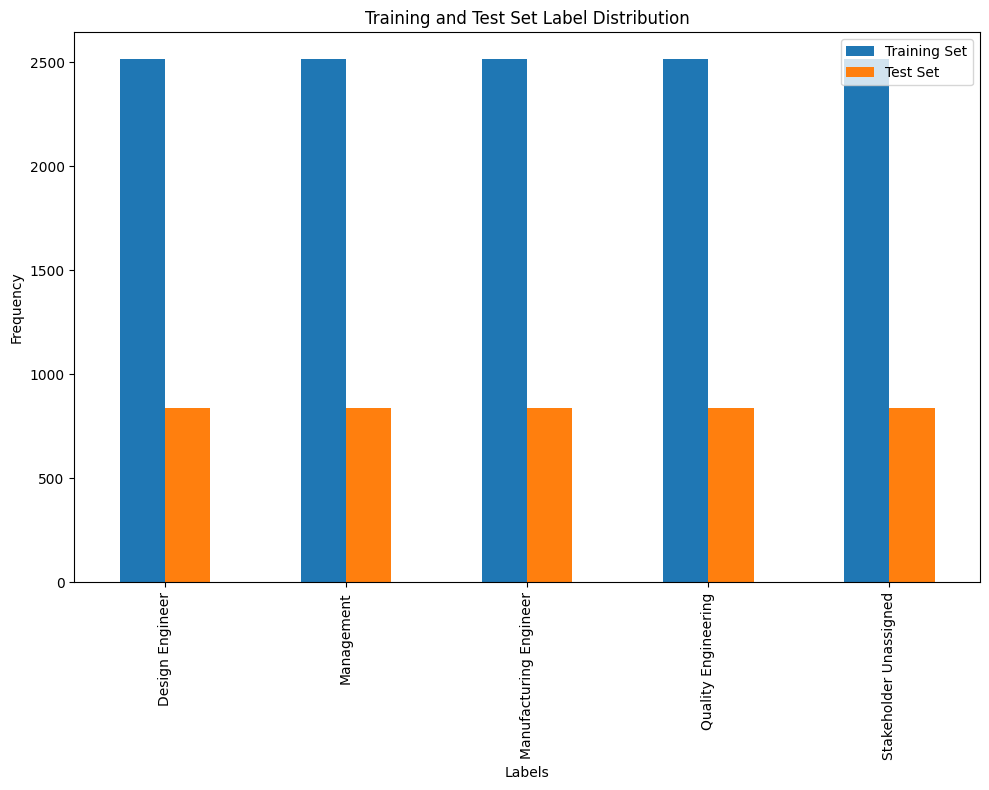

In [ ]:
# Compute frequency distribution for training set
train_counts = pd.Series(y_train).map({0:'Design Engineer', 1:'Management', 2:'Manufacturing Engineer',
                       3:'Quality Engineering', 4:'Stakeholder Unassigned'}).value_counts()

test_counts = pd.Series(y_test).map({0:'Design Engineer', 1:'Management', 2:'Manufacturing Engineer',
                       3:'Quality Engineering', 4:'Stakeholder Unassigned'}).value_counts()

combined_counts = pd.DataFrame({'Training Set': train_counts, 'Test Set': test_counts})

# Visualize the frequency distributions
fig, ax = plt.subplots(figsize=(10, 8))
combined_counts.plot(kind='bar', ax=ax)
ax.set_title('Training and Test Set Label Distribution')
ax.set_xlabel('Labels')
ax.set_ylabel('Frequency')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()


In [ ]:
def results(model, y_pred, y_test):
    accuracy = round(accuracy_score(y_pred, y_test)*100,4)
    precision = round(precision_score(y_pred, y_test, average='macro')*100,4) 
    recall = round(recall_score(y_pred, y_test, average='macro')*100,4)   
    f1_scr = round(f1_score(y_pred, y_test, average='macro')*100,4)
    
    
    print("\nAccuracy: {}%".format(accuracy))  
    print("Precision: {}%".format(precision))    
    print("Recall: {}%".format(recall))    
    print("F1-Score: {}%".format(f1_scr)) 
    print()
    print("Classification Report:")
    print(classification_report(y_pred, y_test, target_names=label_enc.classes_))
    print()
    print("Confusion Matrix:")
    fig, ax = plt.subplots(figsize=(5,5))
    ConfusionMatrixDisplay.from_predictions(y_pred, y_test, 
                                            ax=ax,
                                            display_labels=label_enc.classes_,
                                            xticks_rotation='vertical')
    plt.show()
    
    return {
        'Model':model.__class__.__name__,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1': f1_scr
    }

In [ ]:
def train_model(model):
  # Record the start time
  start_time = time.time()

  # Fit the model on the training data
  model.fit(X_train_tfidf, y_train)

  # Record the end time
  end_time = time.time()

  # Compute the training time in seconds
  training_time = end_time - start_time
  print(f"Training time: {training_time:.3f} seconds")

  # predict the model on testing data
  y_pred = model.predict(X_test_tfidf)

  # get results 
  RESULTS_LR = results(model, y_pred, y_test)

  # Add the training time to RESULTS_LR
  RESULTS_LR['Training time (s)'] = training_time

  return RESULTS_LR, model

In [ ]:
def get_model_results(res):
  # Convert the dictionary to a DataFrame
  return pd.DataFrame.from_dict([res]).set_index('Model')

In [ ]:
def check_cross_validation_score(fold_list, model):
    RES = []
    for cv in fold_list:
        class_counts = y_test.value_counts()

        # Check if the smallest class has enough samples for the current number of splits
        if class_counts.min() < cv:
            print(f"Skipping cross-validation for Fold-{cv} due to insufficient samples in the smallest class.")
            continue

        cv_results = cross_validate(model, X_test_tfidf, y_test, cv=cv, return_train_score=True, scoring='f1_macro')
        # Print the average test score and average training score across all folds
        print(f"Fold-{cv}\t\tAverage F1 train score: {cv_results['train_score'].mean():.3f} - Average F1 test score: {cv_results['test_score'].mean():.3f}")
        RES.append((f"{model.__class__.__name__}-Fold-{cv}",cv_results['train_score'].mean(), cv_results['test_score'].mean()))
    return RES

In [ ]:
def get_cv_results(res):
  return pd.DataFrame(res, columns=['cross-validation', 'F1_train_score', 'F1_test_score'])

In [ ]:
model_tuple = [
    ('LogisticRegression', LogisticRegression(**{'C': 10, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear'})),
    ('GaussianNB', GaussianNB(**{'var_smoothing': 1e-05})),
    ('RandomForest', RandomForestClassifier(**{'bootstrap': False, 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100, 'random_state': 42})),
    ('SVM', SVC(**{'C': 10, 'decision_function_shape': 'ovr', 'kernel': 'rbf', 'random_state': 42, 'probability':True})),
    ('AdaBoost', AdaBoostClassifier(**{'base_estimator': DecisionTreeClassifier(max_depth=5), 'learning_rate': 0.01, 'n_estimators': 100, 'random_state': 42})),
    ('XGBoost', xgb.XGBClassifier(**{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'num_class': 5, 'objective': 'multi:softmax', 'random_state': 42})),
    ('StochasticGradientDescent', SGDClassifier(**{'alpha': 0.0001, 'loss': 'modified_huber', 'penalty': 'elasticnet', 'random_state': 42}))
]

model running:   0%|          | 0/7 [00:00<?, ?it/s]

			 LogisticRegression
Training time: 0.778 seconds

Accuracy: 81.4735%
Precision: 81.4779%
Recall: 83.5969%
F1-Score: 80.7383%

Classification Report:
                        precision    recall  f1-score   support

       Design Engineer       1.00      0.96      0.98       873
            Management       0.72      0.69      0.71       875
Manufacturing Engineer       1.00      0.69      0.81      1221
   Quality Engineering       0.49      0.90      0.64       463
Stakeholder Unassigned       0.86      0.94      0.90       762

              accuracy                           0.81      4194
             macro avg       0.81      0.84      0.81      4194
          weighted avg       0.86      0.81      0.82      4194


Confusion Matrix:


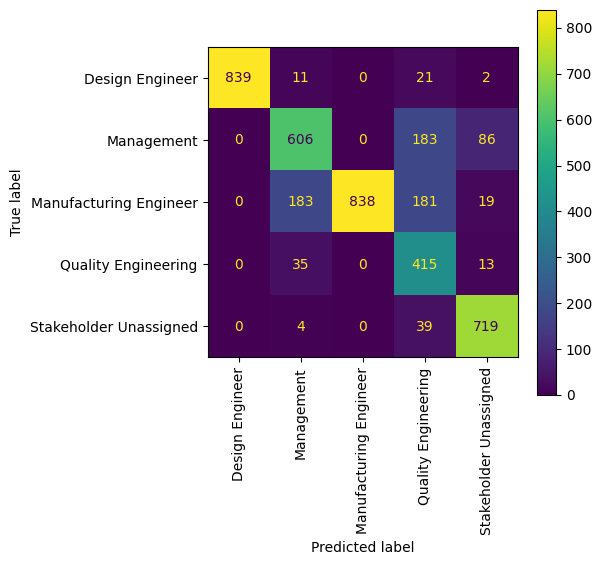

                    Accuracy  Precision   Recall       F1  Training time (s)
Model                                                                       
LogisticRegression   81.4735    81.4779  83.5969  80.7383           0.777632

Fold-5		Average F1 train score: 0.811 - Average F1 test score: 0.796
Fold-10		Average F1 train score: 0.815 - Average F1 test score: 0.804
Fold-15		Average F1 train score: 0.815 - Average F1 test score: 0.804
Fold-20		Average F1 train score: 0.814 - Average F1 test score: 0.802
____________________________________________________________________________________________________
			 GaussianNB
Training time: 0.077 seconds

Accuracy: 63.114%
Precision: 63.122%
Recall: 64.9656%
F1-Score: 58.9244%

Classification Report:
                        precision    recall  f1-score   support

       Design Engineer       1.00      0.55      0.71      1513
            Management       0.41      0.75      0.53       463
Manufacturing Engineer       0.97      0.59      0.73

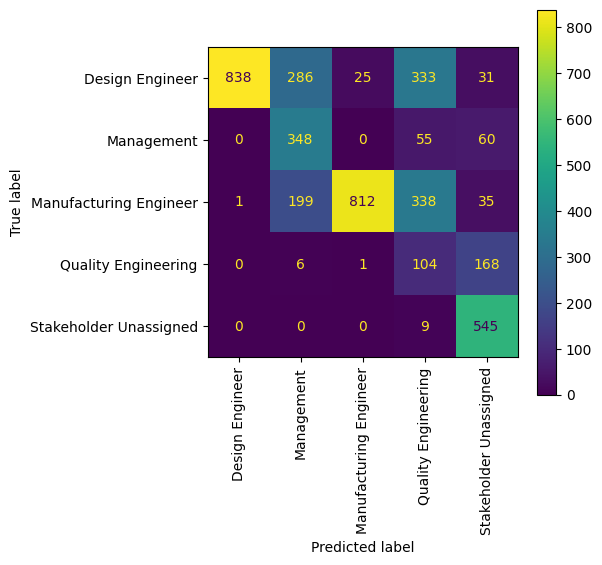

            Accuracy  Precision   Recall       F1  Training time (s)
Model                                                               
GaussianNB    63.114     63.122  64.9656  58.9244            0.07715

Fold-5		Average F1 train score: 0.612 - Average F1 test score: 0.605
Fold-10		Average F1 train score: 0.611 - Average F1 test score: 0.604
Fold-15		Average F1 train score: 0.611 - Average F1 test score: 0.601
Fold-20		Average F1 train score: 0.611 - Average F1 test score: 0.600
____________________________________________________________________________________________________
			 RandomForest
Training time: 2.328 seconds

Accuracy: 81.7835%
Precision: 81.7874%
Recall: 84.1478%
F1-Score: 81.3565%

Classification Report:
                        precision    recall  f1-score   support

       Design Engineer       1.00      0.97      0.99       860
            Management       0.75      0.66      0.70       957
Manufacturing Engineer       0.98      0.71      0.82      1167
   Qualit

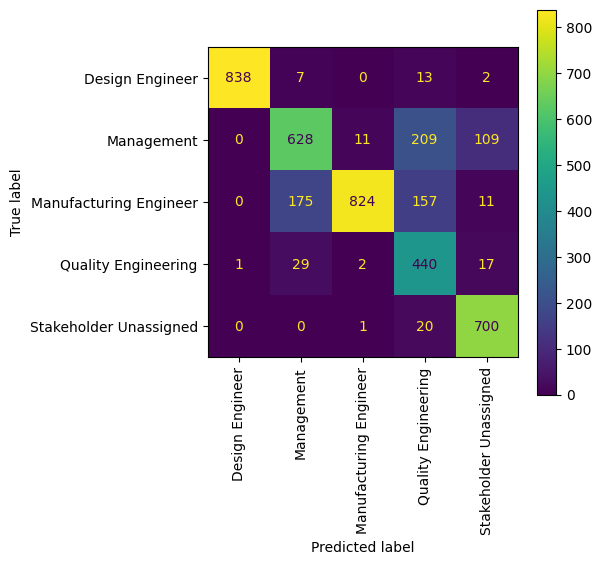

                        Accuracy  Precision   Recall       F1  \
Model                                                           
RandomForestClassifier   81.7835    81.7874  84.1478  81.3565   

                        Training time (s)  
Model                                      
RandomForestClassifier           2.327621  

Fold-5		Average F1 train score: 0.838 - Average F1 test score: 0.807
Fold-10		Average F1 train score: 0.837 - Average F1 test score: 0.808
Fold-15		Average F1 train score: 0.836 - Average F1 test score: 0.808
Fold-20		Average F1 train score: 0.835 - Average F1 test score: 0.809
____________________________________________________________________________________________________
			 SVM
Training time: 44.715 seconds

Accuracy: 83.0234%
Precision: 83.0259%
Recall: 84.1032%
F1-Score: 82.8634%

Classification Report:
                        precision    recall  f1-score   support

       Design Engineer       1.00      0.98      0.99       855
            Management  

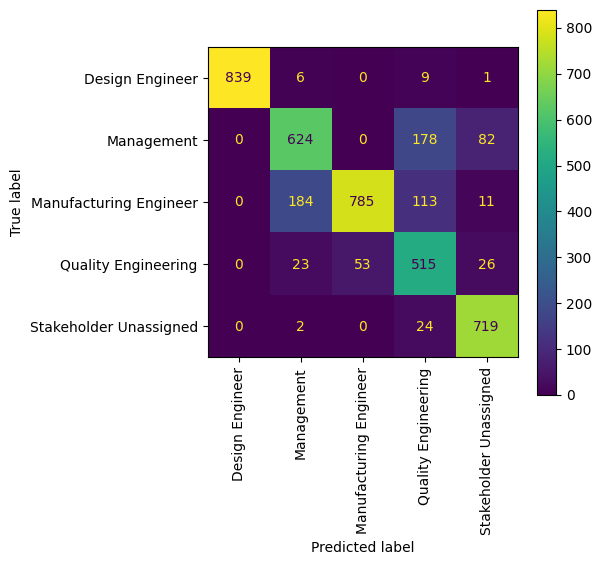

       Accuracy  Precision   Recall       F1  Training time (s)
Model                                                          
SVC     83.0234    83.0259  84.1032  82.8634          44.715212

Fold-5		Average F1 train score: 0.832 - Average F1 test score: 0.810
Fold-10		Average F1 train score: 0.833 - Average F1 test score: 0.815
Fold-15		Average F1 train score: 0.833 - Average F1 test score: 0.814
Fold-20		Average F1 train score: 0.833 - Average F1 test score: 0.814
____________________________________________________________________________________________________
			 AdaBoost
Training time: 21.656 seconds

Accuracy: 79.2799%
Precision: 79.2823%
Recall: 79.0978%
F1-Score: 78.6981%

Classification Report:
                        precision    recall  f1-score   support

       Design Engineer       1.00      0.98      0.99       851
            Management       0.60      0.64      0.62       782
Manufacturing Engineer       0.89      0.74      0.81      1018
   Quality Engineering     

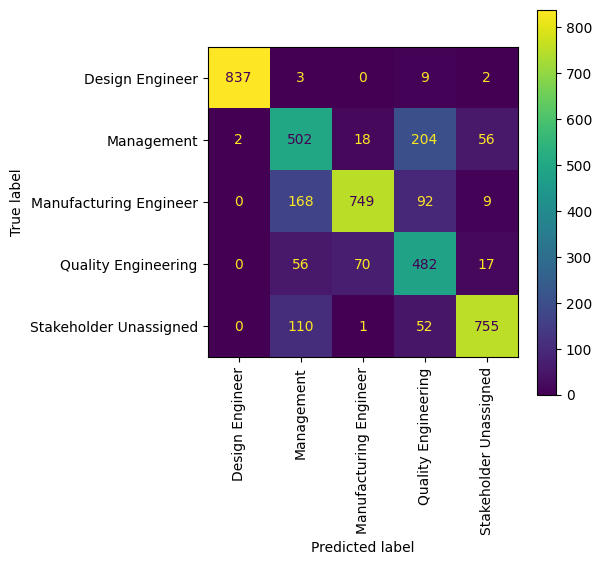

                    Accuracy  Precision   Recall       F1  Training time (s)
Model                                                                       
AdaBoostClassifier   79.2799    79.2823  79.0978  78.6981          21.655985

Fold-5		Average F1 train score: 0.806 - Average F1 test score: 0.772
Fold-10		Average F1 train score: 0.811 - Average F1 test score: 0.774
Fold-15		Average F1 train score: 0.815 - Average F1 test score: 0.782
Fold-20		Average F1 train score: 0.808 - Average F1 test score: 0.779
____________________________________________________________________________________________________
			 XGBoost
Training time: 9.105 seconds

Accuracy: 82.9518%
Precision: 82.9541%
Recall: 83.9812%
F1-Score: 82.8723%

Classification Report:
                        precision    recall  f1-score   support

       Design Engineer       1.00      0.98      0.99       849
            Management       0.75      0.68      0.72       923
Manufacturing Engineer       0.93      0.74      0.82 

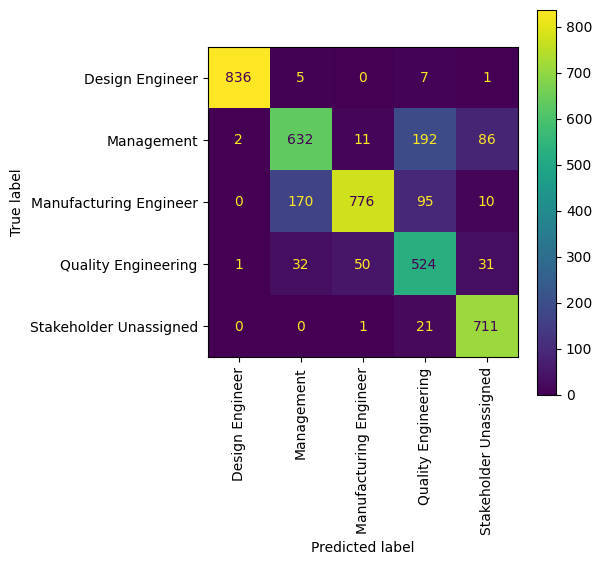

               Accuracy  Precision   Recall       F1  Training time (s)
Model                                                                  
XGBClassifier   82.9518    82.9541  83.9812  82.8723           9.105487

Fold-5		Average F1 train score: 0.844 - Average F1 test score: 0.812
Fold-10		Average F1 train score: 0.843 - Average F1 test score: 0.814
Fold-15		Average F1 train score: 0.842 - Average F1 test score: 0.815
Fold-20		Average F1 train score: 0.842 - Average F1 test score: 0.814
____________________________________________________________________________________________________
			 StochasticGradientDescent
Training time: 4.383 seconds

Accuracy: 80.1144%
Precision: 80.1117%
Recall: 83.3828%
F1-Score: 80.3557%

Classification Report:
                        precision    recall  f1-score   support

       Design Engineer       1.00      0.96      0.98       872
            Management       0.91      0.58      0.70      1323
Manufacturing Engineer       0.68      0.91      0.

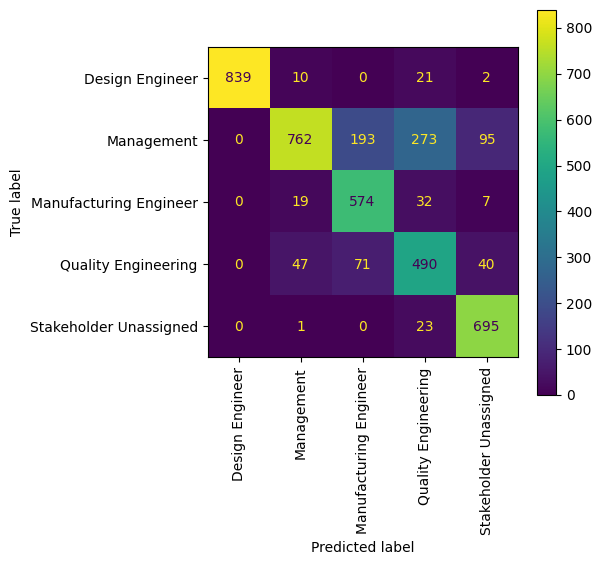

               Accuracy  Precision   Recall       F1  Training time (s)
Model                                                                  
SGDClassifier   80.1144    80.1117  83.3828  80.3557           4.382642

Fold-5		Average F1 train score: 0.808 - Average F1 test score: 0.787
Fold-10		Average F1 train score: 0.813 - Average F1 test score: 0.805
Fold-15		Average F1 train score: 0.804 - Average F1 test score: 0.785
Fold-20		Average F1 train score: 0.804 - Average F1 test score: 0.788
____________________________________________________________________________________________________


In [ ]:
# Define the cross validation list
cross_validation = [5, 10, 15, 20]

MODELS_RESULT = []
CV_MODELS_RESULT = []
MODELS_OBJECT = []

for i in tqdm(model_tuple, desc='model running'):
  print("="*100)
  print(f"\t\t\t {i[0]}")
  print("="*100)
  RESULT, model_obj = train_model(i[1])
  MODELS_OBJECT.append(model_obj)
  df_results = get_model_results(RESULT)
  MODELS_RESULT.append(df_results)
  print(df_results)
  print()
  RES = check_cross_validation_score(cross_validation, i[1])
  df_results_cv_lr = get_cv_results(RES)
  CV_MODELS_RESULT.append(df_results_cv_lr)
  print("_"*100)

In [ ]:
df_all_models = pd.concat([MODELS_RESULT[0], MODELS_RESULT[1],
                           MODELS_RESULT[2],
                           MODELS_RESULT[3], MODELS_RESULT[4], MODELS_RESULT[5],
                           MODELS_RESULT[6]
                           ])
df_all_models

,Accuracy,Precision,Recall,F1,Training time (s)
Model,,,,,
LogisticRegression,81.4735,81.4779,83.5969,80.7383,0.777632
GaussianNB,63.1140,63.1220,64.9656,58.9244,0.077150
RandomForestClassifier,81.7835,81.7874,84.1478,81.3565,2.327621
SVC,83.0234,83.0259,84.1032,82.8634,44.715212
AdaBoostClassifier,79.2799,79.2823,79.0978,78.6981,21.655985
XGBClassifier,82.9518,82.9541,83.9812,82.8723,9.105487
SGDClassifier,80.1144,80.1117,83.3828,80.3557,4.382642


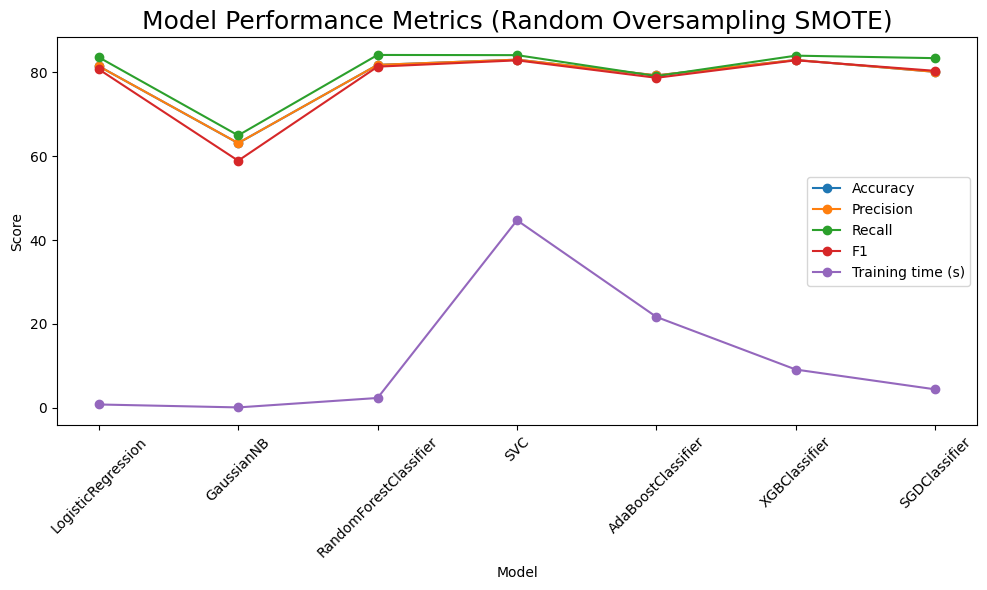

In [ ]:
import matplotlib.pyplot as plt

# Assuming df_all_models contains columns: 'Model', 'Accuracy', 'Precision', 'Recall', 'F1', 'Training time (s)'
plt.figure(figsize=(10, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'Training time (s)']
models = df_all_models.index

for metric in metrics:
    plt.plot(models, df_all_models[metric], marker='o', label=metric)

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance Metrics (Random Oversampling SMOTE)',fontsize=18)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
df_all_models_cv = pd.concat([CV_MODELS_RESULT[0], CV_MODELS_RESULT[1], CV_MODELS_RESULT[2],
                              CV_MODELS_RESULT[3], CV_MODELS_RESULT[4], CV_MODELS_RESULT[5],
                              CV_MODELS_RESULT[6]]).set_index("cross-validation")
df_all_models_cv

,F1_train_score,F1_test_score
cross-validation,,
LogisticRegression-Fold-5,0.810994,0.795817
LogisticRegression-Fold-10,0.814806,0.804087
LogisticRegression-Fold-15,0.814690,0.804089
LogisticRegression-Fold-20,0.814284,0.802446
GaussianNB-Fold-5,0.611722,0.604912
GaussianNB-Fold-10,0.611339,0.604246
GaussianNB-Fold-15,0.611264,0.601409
GaussianNB-Fold-20,0.610650,0.599668
RandomForestClassifier-Fold-5,0.838272,0.806945


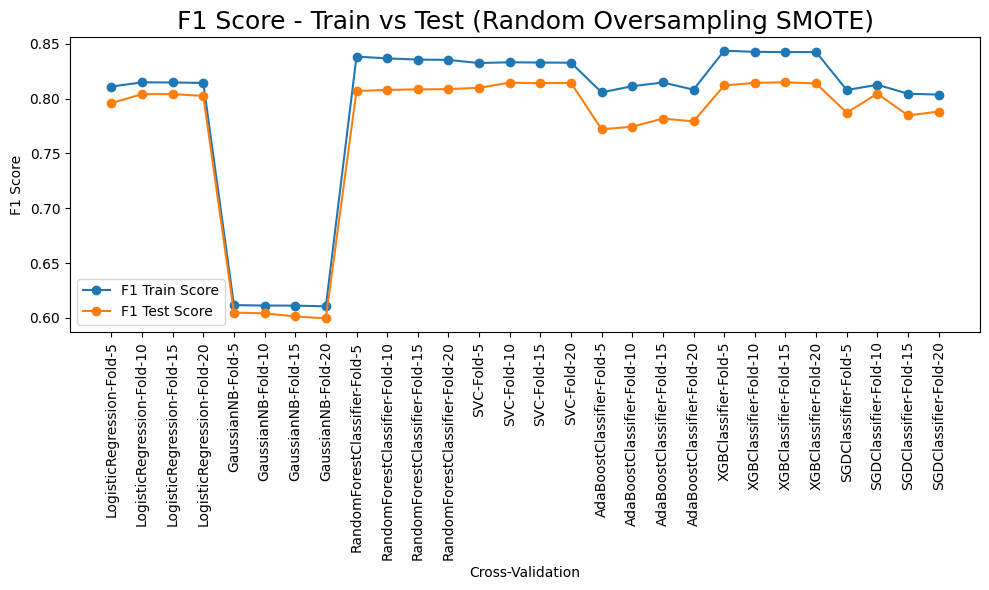

In [ ]:
import matplotlib.pyplot as plt

# Assuming df_all_models_cv contains columns: 'cross-validation', 'F1_train_score', 'F1_test_score'
plt.figure(figsize=(10, 6))
models_cv = df_all_models_cv.index

plt.plot(models_cv, df_all_models_cv['F1_train_score'], marker='o', label='F1 Train Score')
plt.plot(models_cv, df_all_models_cv['F1_test_score'], marker='o', label='F1 Test Score')

plt.xlabel('Cross-Validation')
plt.ylabel('F1 Score')
plt.title('F1 Score - Train vs Test (Random Oversampling SMOTE)', fontsize=18)
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


## **AUC-ROC Curve**

In [ ]:
def compute_AUC_ROC(model, n_classes=5):
  from sklearn.metrics import roc_auc_score, auc
  from sklearn.metrics import roc_curve

  y_test_int = y_test
  Y_pred = model.predict_proba(X_test_tfidf)

  n_classes = n_classes

  # Calculate ROC-AUC for each class
  roc_auc = {}
  for i in range(n_classes):
      roc_auc[i] = roc_auc_score((y_test_int == i).astype(int), Y_pred[:, i])

  # Get class names from label encoder object
  class_names = label_enc.classes_

  # Plot ROC-AUC curve for each class
  plt.figure(figsize=(10,10))
  for i in range(n_classes):
      fpr, tpr, _ = roc_curve((y_test_int == i).astype(int), Y_pred[:, i])
      roc_auc_i = auc(fpr, tpr)
      plt.plot(fpr, tpr, lw=2, label='{}: AUC = {:.3f}'.format(class_names[i], roc_auc_i))

  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'AUC-ROC Curve ({model.__class__.__name__})')
  plt.legend(loc="lower right")
  plt.savefig("auc_roc_curve.png", bbox_inches='tight')
  plt.show()

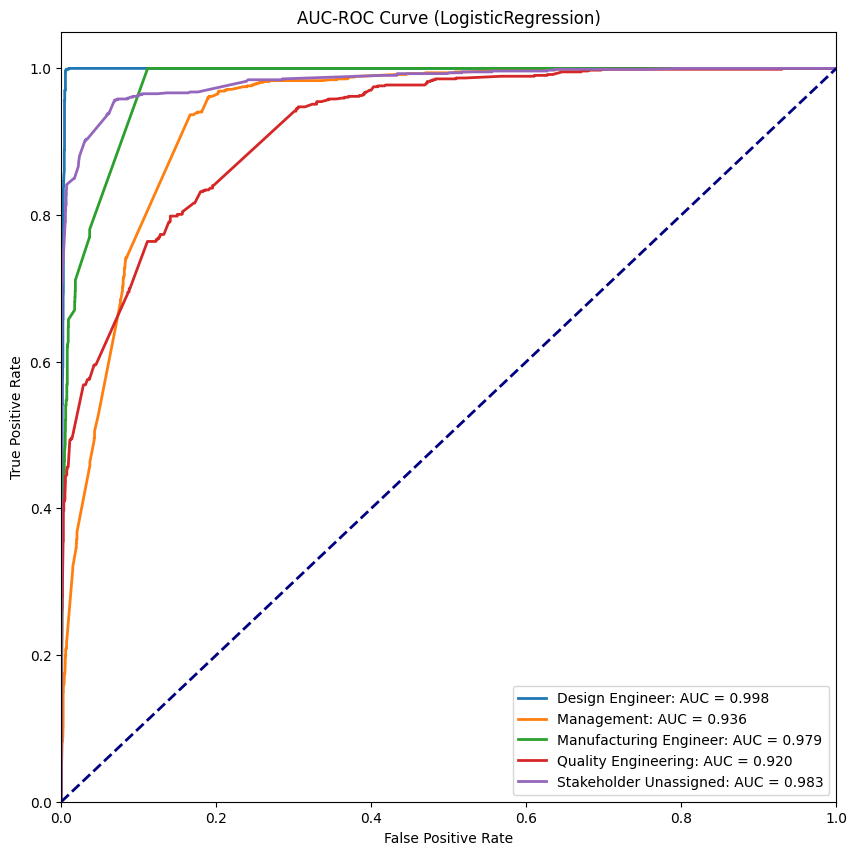

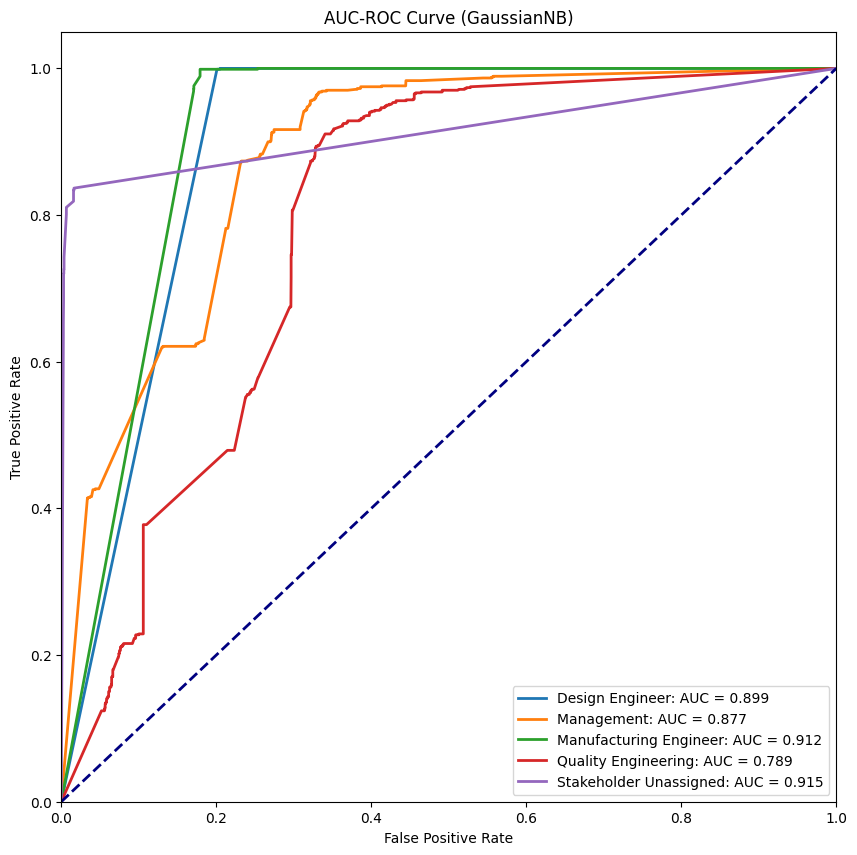

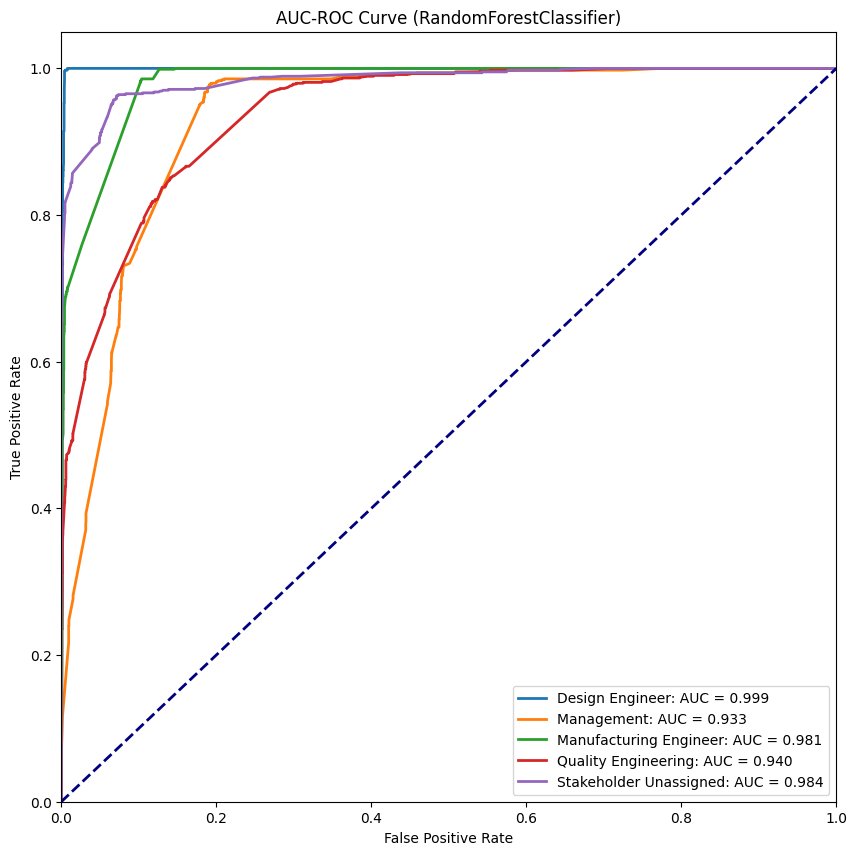

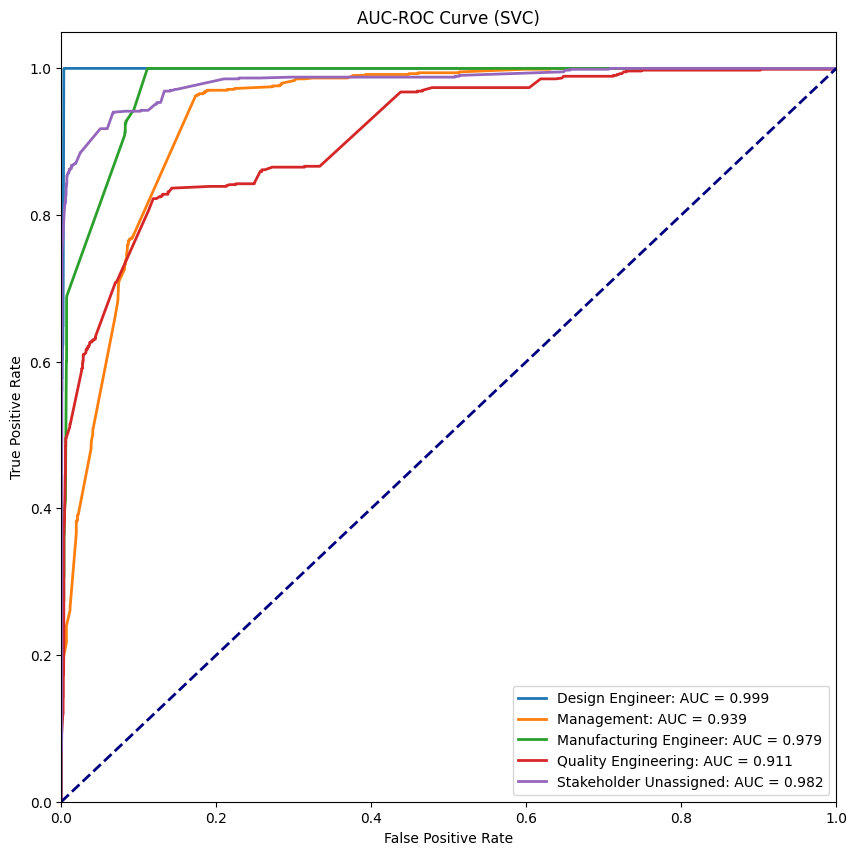

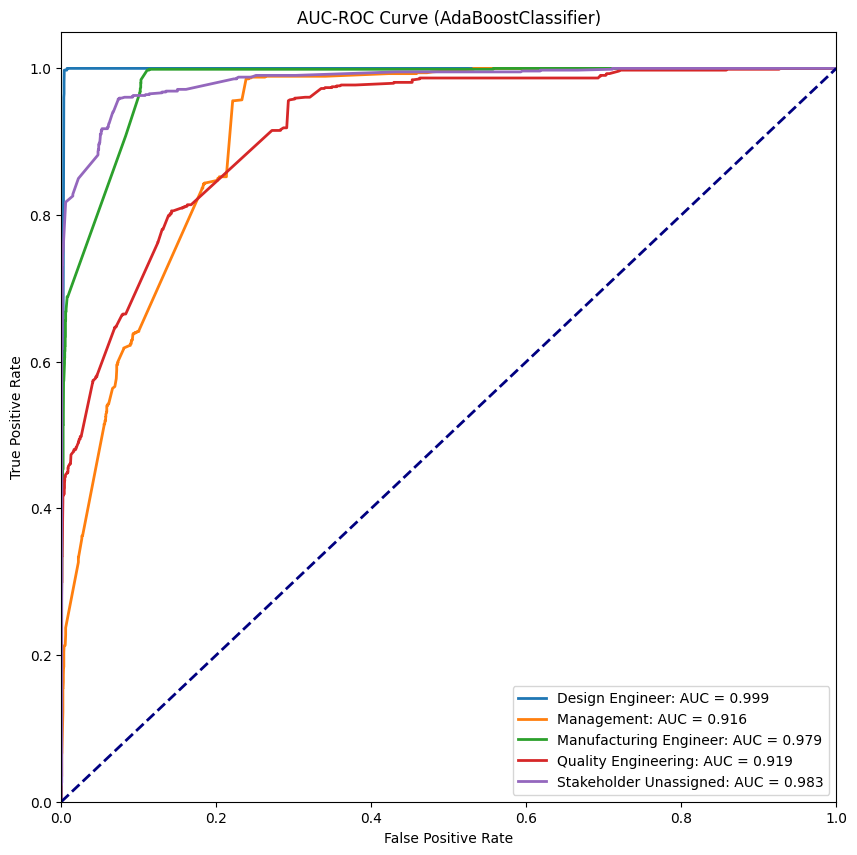

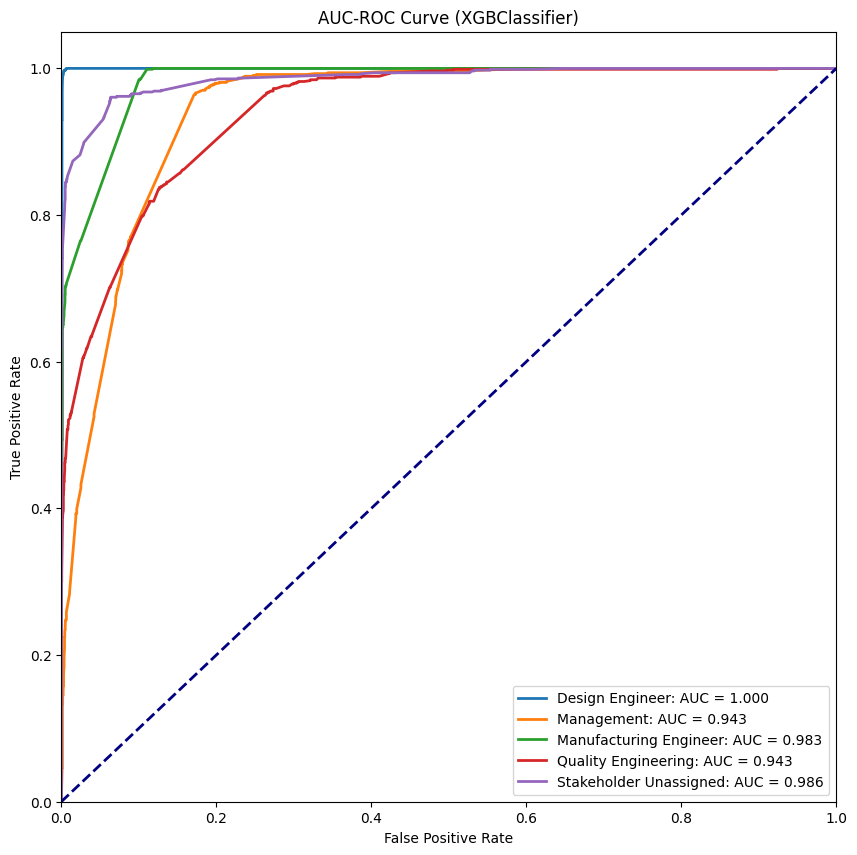

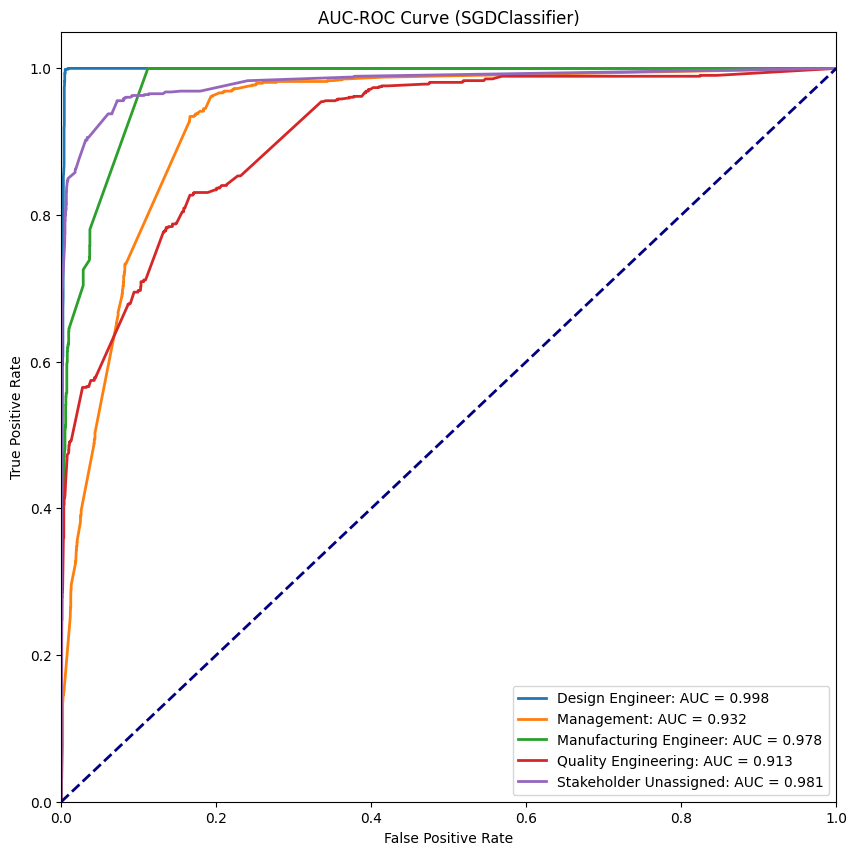

In [ ]:
for i in MODELS_OBJECT:
  compute_AUC_ROC(i)

## **Random undersampling**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
undersample = RandomUnderSampler(random_state=42)
underX,underY=undersample.fit_resample(X_tfidff, y)

pd.DataFrame(underY)['PRIMARY_LABEL_ENC'].value_counts()

0    45
1    45
2    45
3    45
4    45
Name: PRIMARY_LABEL_ENC, dtype: int64

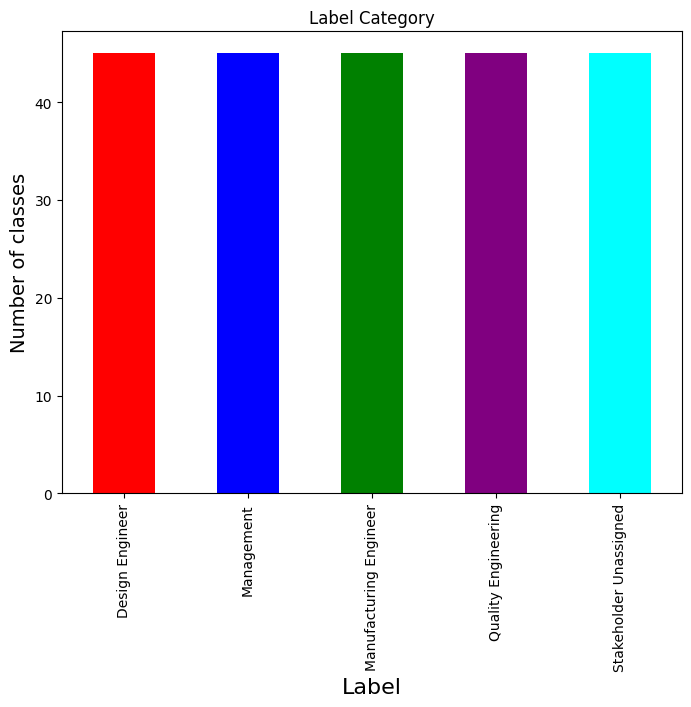

In [ ]:
# First under sampling to make all classes equal

ax=pd.DataFrame(underY)['PRIMARY_LABEL_ENC'].value_counts().plot(kind='bar',color=['red','blue', 'green',
                                                                                  'purple', 'cyan'],
                                          title='Label Category',figsize=(8, 6))

plt.xticks(range(5),label_enc.classes_.tolist())
ax.set_xlabel("Label",fontsize=16)
ax.set_ylabel("Number of classes",fontsize=14)
plt.show()

In [ ]:
# split data into 75% training and 25% testing set
X_train_tfidf , X_test_tfidf, y_train, y_test = splitting_dataset(underX,underY, test_size=0.25)

training shape : (168, 470)
testing shape : (57, 470)


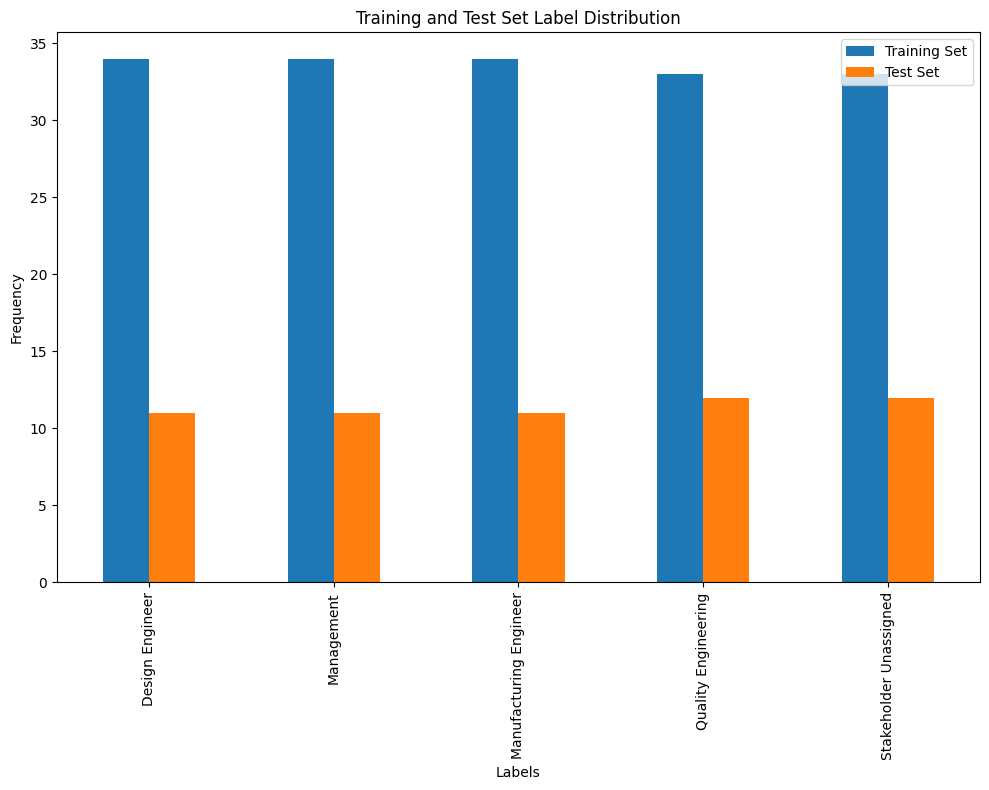

In [ ]:
# Compute frequency distribution for training set
train_counts = pd.Series(y_train).map({0:'Design Engineer', 1:'Management', 2:'Manufacturing Engineer',
                       3:'Quality Engineering', 4:'Stakeholder Unassigned'}).value_counts()

test_counts = pd.Series(y_test).map({0:'Design Engineer', 1:'Management', 2:'Manufacturing Engineer',
                       3:'Quality Engineering', 4:'Stakeholder Unassigned'}).value_counts()

combined_counts = pd.DataFrame({'Training Set': train_counts, 'Test Set': test_counts})

# Visualize the frequency distributions
fig, ax = plt.subplots(figsize=(10, 8))
combined_counts.plot(kind='bar', ax=ax)
ax.set_title('Training and Test Set Label Distribution')
ax.set_xlabel('Labels')
ax.set_ylabel('Frequency')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()


model running:   0%|          | 0/7 [00:00<?, ?it/s]

			 LogisticRegression
Training time: 0.006 seconds

Accuracy: 70.1754%
Precision: 70.1515%
Recall: 72.1266%
F1-Score: 70.1771%

Classification Report:
                        precision    recall  f1-score   support

       Design Engineer       1.00      1.00      1.00        11
            Management       0.45      0.71      0.56         7
Manufacturing Engineer       0.64      0.44      0.52        16
   Quality Engineering       0.42      0.45      0.43        11
Stakeholder Unassigned       1.00      1.00      1.00        12

              accuracy                           0.70        57
             macro avg       0.70      0.72      0.70        57
          weighted avg       0.72      0.70      0.70        57


Confusion Matrix:


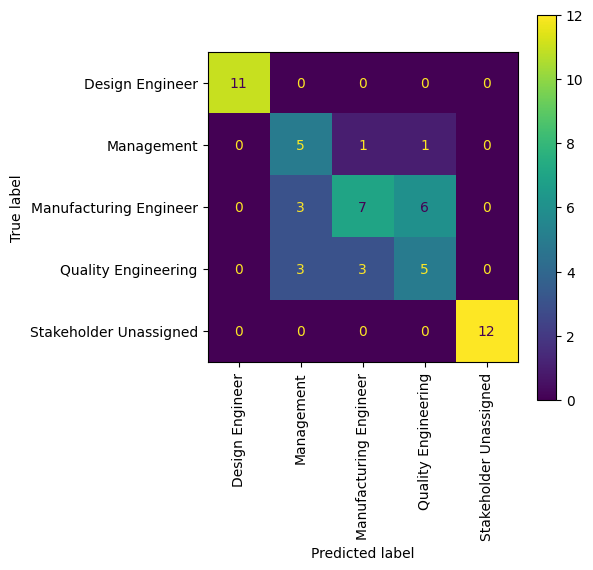

                    Accuracy  Precision   Recall       F1  Training time (s)
Model                                                                       
LogisticRegression   70.1754    70.1515  72.1266  70.1771           0.006033

Fold-5		Average F1 train score: 0.904 - Average F1 test score: 0.596
Fold-10		Average F1 train score: 0.894 - Average F1 test score: 0.595
Skipping cross-validation for Fold-15 due to insufficient samples in the smallest class.
Skipping cross-validation for Fold-20 due to insufficient samples in the smallest class.
____________________________________________________________________________________________________
			 GaussianNB
Training time: 0.003 seconds

Accuracy: 61.4035%
Precision: 61.9697%
Recall: 55.9041%
F1-Score: 56.8072%

Classification Report:
                        precision    recall  f1-score   support

       Design Engineer       0.91      0.77      0.83        13
            Management       0.91      0.45      0.61        22
Manufacturing

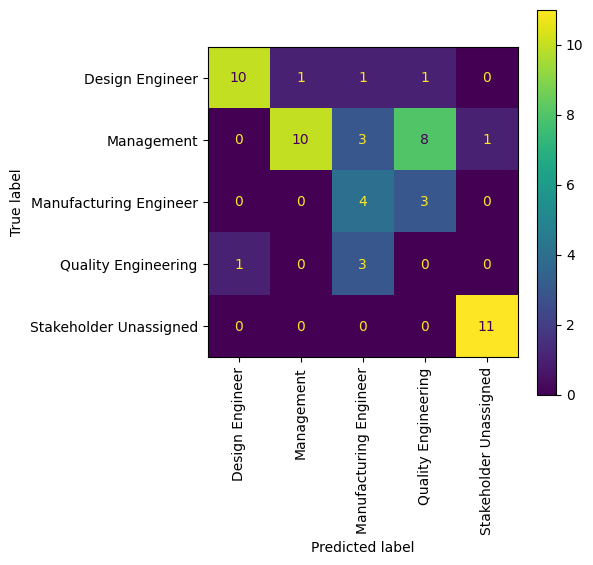

            Accuracy  Precision   Recall       F1  Training time (s)
Model                                                               
GaussianNB   61.4035    61.9697  55.9041  56.8072           0.003203

Fold-5		Average F1 train score: 0.815 - Average F1 test score: 0.500
Fold-10		Average F1 train score: 0.812 - Average F1 test score: 0.534
Skipping cross-validation for Fold-15 due to insufficient samples in the smallest class.
Skipping cross-validation for Fold-20 due to insufficient samples in the smallest class.
____________________________________________________________________________________________________
			 RandomForest
Training time: 0.127 seconds

Accuracy: 66.6667%
Precision: 66.5152%
Recall: 67.2191%
F1-Score: 65.6686%

Classification Report:
                        precision    recall  f1-score   support

       Design Engineer       1.00      0.92      0.96        12
            Management       0.36      0.67      0.47         6
Manufacturing Engineer       0.55  

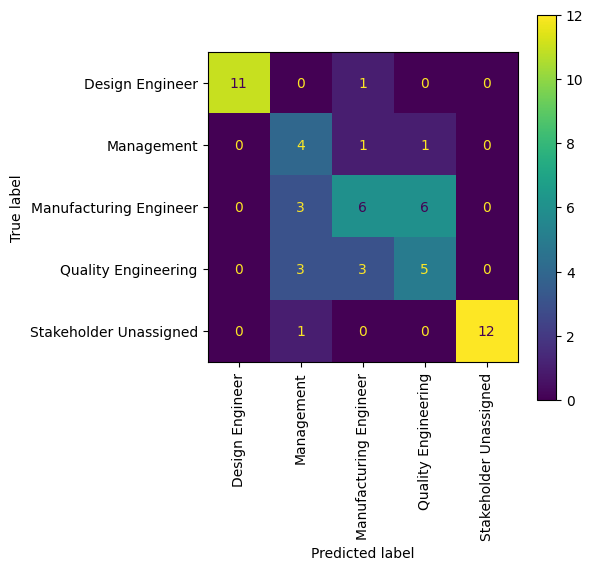

                        Accuracy  Precision   Recall       F1  \
Model                                                           
RandomForestClassifier   66.6667    66.5152  67.2191  65.6686   

                        Training time (s)  
Model                                      
RandomForestClassifier           0.127206  

Fold-5		Average F1 train score: 0.907 - Average F1 test score: 0.557
Fold-10		Average F1 train score: 0.896 - Average F1 test score: 0.590
Skipping cross-validation for Fold-15 due to insufficient samples in the smallest class.
Skipping cross-validation for Fold-20 due to insufficient samples in the smallest class.
____________________________________________________________________________________________________
			 SVM
Training time: 0.036 seconds

Accuracy: 70.1754%
Precision: 70.0%
Recall: 70.5611%
F1-Score: 69.4763%

Classification Report:
                        precision    recall  f1-score   support

       Design Engineer       1.00      0.92      0.96 

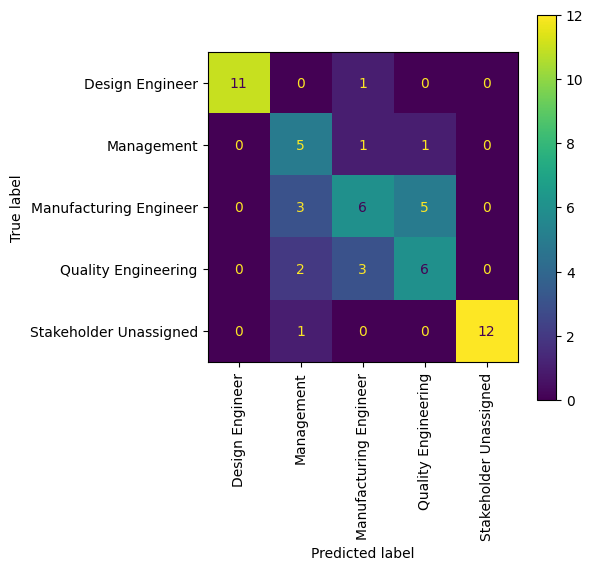

       Accuracy  Precision   Recall       F1  Training time (s)
Model                                                          
SVC     70.1754       70.0  70.5611  69.4763           0.035568

Fold-5		Average F1 train score: 0.909 - Average F1 test score: 0.568
Fold-10		Average F1 train score: 0.898 - Average F1 test score: 0.530
Skipping cross-validation for Fold-15 due to insufficient samples in the smallest class.
Skipping cross-validation for Fold-20 due to insufficient samples in the smallest class.
____________________________________________________________________________________________________
			 AdaBoost
Training time: 0.360 seconds

Accuracy: 64.9123%
Precision: 64.697%
Recall: 65.0866%
F1-Score: 63.4273%

Classification Report:
                        precision    recall  f1-score   support

       Design Engineer       0.91      0.91      0.91        11
            Management       0.36      0.67      0.47         6
Manufacturing Engineer       0.55      0.43      0.48  

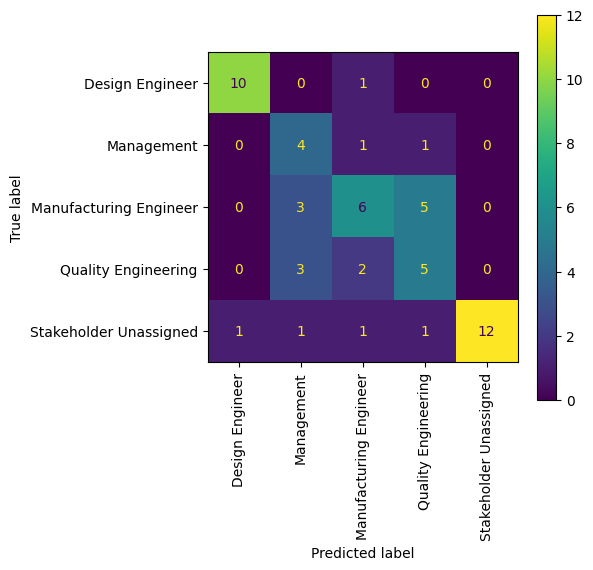

                    Accuracy  Precision   Recall       F1  Training time (s)
Model                                                                       
AdaBoostClassifier   64.9123     64.697  65.0866  63.4273           0.360172

Fold-5		Average F1 train score: 0.907 - Average F1 test score: 0.623
Fold-10		Average F1 train score: 0.897 - Average F1 test score: 0.555
Skipping cross-validation for Fold-15 due to insufficient samples in the smallest class.
Skipping cross-validation for Fold-20 due to insufficient samples in the smallest class.
____________________________________________________________________________________________________
			 XGBoost
Training time: 0.509 seconds

Accuracy: 68.4211%
Precision: 68.1818%
Recall: 68.29%
F1-Score: 67.0385%

Classification Report:
                        precision    recall  f1-score   support

       Design Engineer       1.00      0.92      0.96        12
            Management       0.36      0.67      0.47         6
Manufacturing Engi

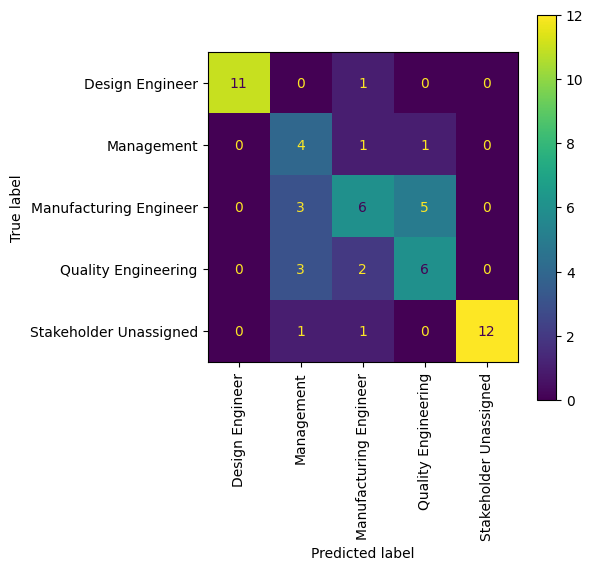

               Accuracy  Precision  Recall       F1  Training time (s)
Model                                                                 
XGBClassifier   68.4211    68.1818   68.29  67.0385           0.508749

Fold-5		Average F1 train score: 0.909 - Average F1 test score: 0.600
Fold-10		Average F1 train score: 0.898 - Average F1 test score: 0.585
Skipping cross-validation for Fold-15 due to insufficient samples in the smallest class.
Skipping cross-validation for Fold-20 due to insufficient samples in the smallest class.
____________________________________________________________________________________________________
			 StochasticGradientDescent
Training time: 0.045 seconds

Accuracy: 70.1754%
Precision: 70.1515%
Recall: 72.6667%
F1-Score: 69.9977%

Classification Report:
                        precision    recall  f1-score   support

       Design Engineer       1.00      0.92      0.96        12
            Management       0.45      0.83      0.59         6
Manufacturing En

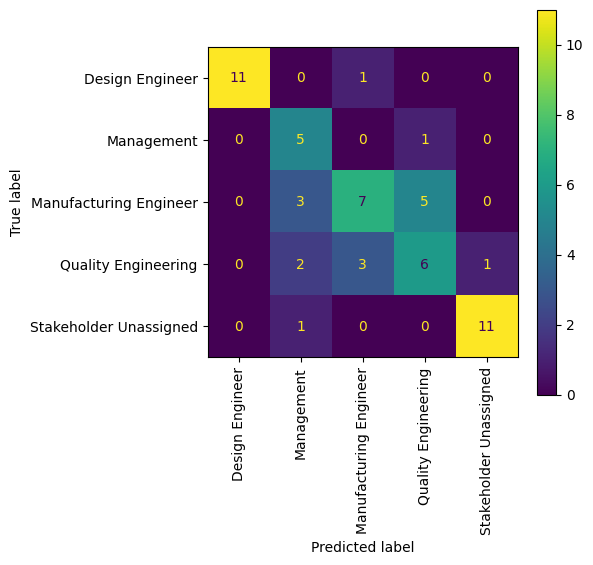

               Accuracy  Precision   Recall       F1  Training time (s)
Model                                                                  
SGDClassifier   70.1754    70.1515  72.6667  69.9977           0.045384

Fold-5		Average F1 train score: 0.856 - Average F1 test score: 0.602
Fold-10		Average F1 train score: 0.872 - Average F1 test score: 0.595
Skipping cross-validation for Fold-15 due to insufficient samples in the smallest class.
Skipping cross-validation for Fold-20 due to insufficient samples in the smallest class.
____________________________________________________________________________________________________


In [ ]:
# Define the cross validation list
cross_validation = [5, 10, 15, 20]

MODELS_RESULT = []
CV_MODELS_RESULT = []
MODELS_OBJECT_UNDER = []

for i in tqdm(model_tuple, desc='model running'):
  print("="*100)
  print(f"\t\t\t {i[0]}")
  print("="*100)
  RESULT, model_obj_under = train_model(i[1])
  df_results = get_model_results(RESULT)
  MODELS_RESULT.append(df_results)
  MODELS_OBJECT_UNDER.append(model_obj_under)
  print(df_results)
  print()
  RES = check_cross_validation_score(cross_validation, i[1])
  df_results_cv_lr = get_cv_results(RES)
  CV_MODELS_RESULT.append(df_results_cv_lr)
  print("_"*100)

In [ ]:
df_all_models_under = pd.concat([MODELS_RESULT[0], MODELS_RESULT[1], MODELS_RESULT[2],
                           MODELS_RESULT[3], MODELS_RESULT[4], MODELS_RESULT[5],
                           MODELS_RESULT[6]])
df_all_models_under

,Accuracy,Precision,Recall,F1,Training time (s)
Model,,,,,
LogisticRegression,70.1754,70.1515,72.1266,70.1771,0.006033
GaussianNB,61.4035,61.9697,55.9041,56.8072,0.003203
RandomForestClassifier,66.6667,66.5152,67.2191,65.6686,0.127206
SVC,70.1754,70.0000,70.5611,69.4763,0.035568
AdaBoostClassifier,64.9123,64.6970,65.0866,63.4273,0.360172
XGBClassifier,68.4211,68.1818,68.2900,67.0385,0.508749
SGDClassifier,70.1754,70.1515,72.6667,69.9977,0.045384


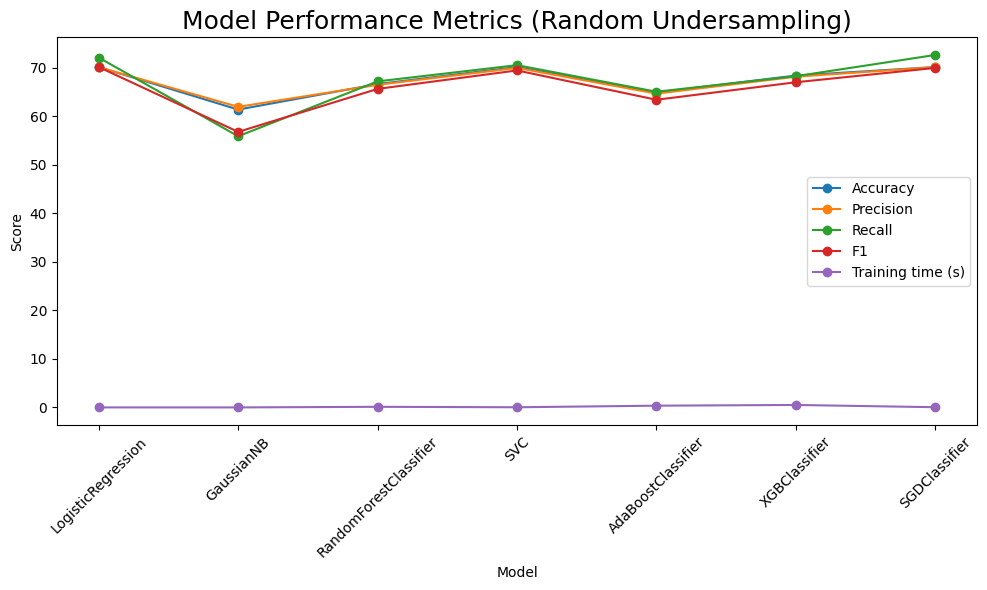

In [ ]:
import matplotlib.pyplot as plt

# Assuming df_all_models contains columns: 'Model', 'Accuracy', 'Precision', 'Recall', 'F1', 'Training time (s)'
plt.figure(figsize=(10, 6))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'Training time (s)']
models = df_all_models_under.index

for metric in metrics:
    plt.plot(models, df_all_models_under[metric], marker='o', label=metric)

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance Metrics (Random Undersampling)',fontsize=18)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
df_all_models_cv = pd.concat([CV_MODELS_RESULT[0], CV_MODELS_RESULT[1], CV_MODELS_RESULT[2],
                              CV_MODELS_RESULT[3], CV_MODELS_RESULT[4], CV_MODELS_RESULT[5],
                              CV_MODELS_RESULT[6]]).set_index("cross-validation")
df_all_models_cv

,F1_train_score,F1_test_score
cross-validation,,
LogisticRegression-Fold-5,0.904321,0.595810
LogisticRegression-Fold-10,0.893925,0.594667
GaussianNB-Fold-5,0.815360,0.500000
GaussianNB-Fold-10,0.811726,0.534000
RandomForestClassifier-Fold-5,0.907160,0.557333
RandomForestClassifier-Fold-10,0.896243,0.590000
SVC-Fold-5,0.909067,0.568190
SVC-Fold-10,0.898259,0.530000
AdaBoostClassifier-Fold-5,0.906559,0.622667


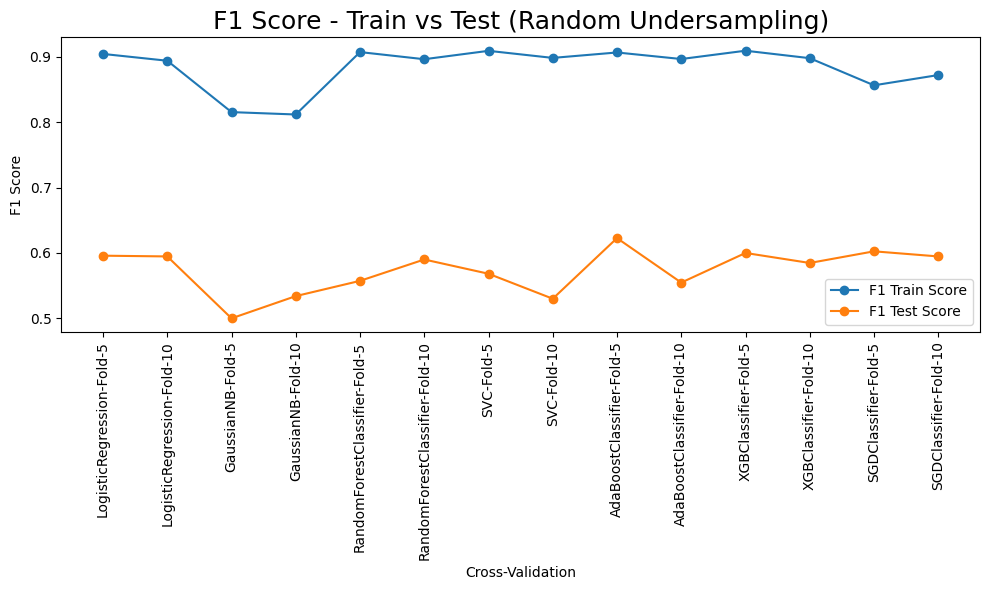

In [ ]:
import matplotlib.pyplot as plt

# Assuming df_all_models_cv contains columns: 'cross-validation', 'F1_train_score', 'F1_test_score'
plt.figure(figsize=(10, 6))
models_cv = df_all_models_cv.index

plt.plot(models_cv, df_all_models_cv['F1_train_score'], marker='o', label='F1 Train Score')
plt.plot(models_cv, df_all_models_cv['F1_test_score'], marker='o', label='F1 Test Score')

plt.xlabel('Cross-Validation')
plt.ylabel('F1 Score')
plt.title('F1 Score - Train vs Test (Random Undersampling)', fontsize=18)
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


## **AUC-ROC Curve**

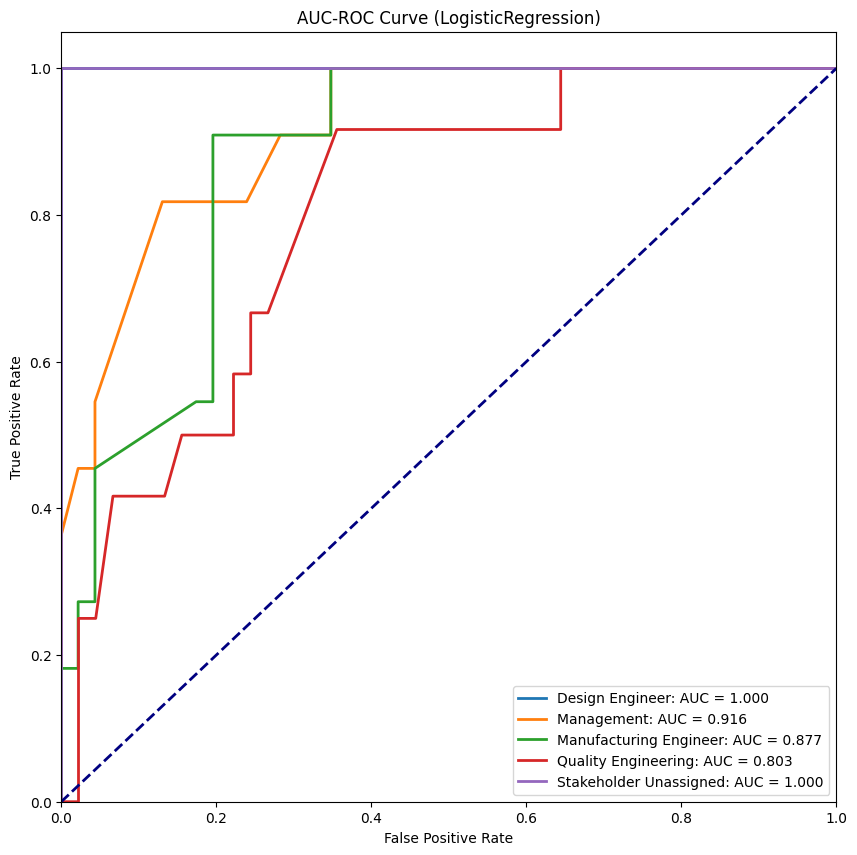

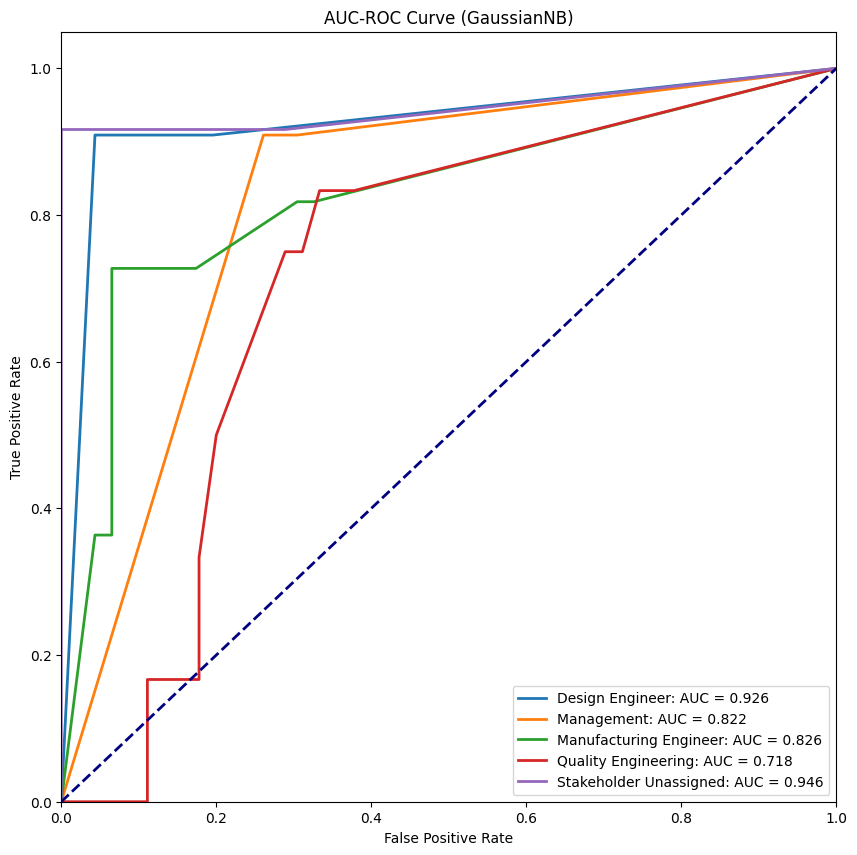

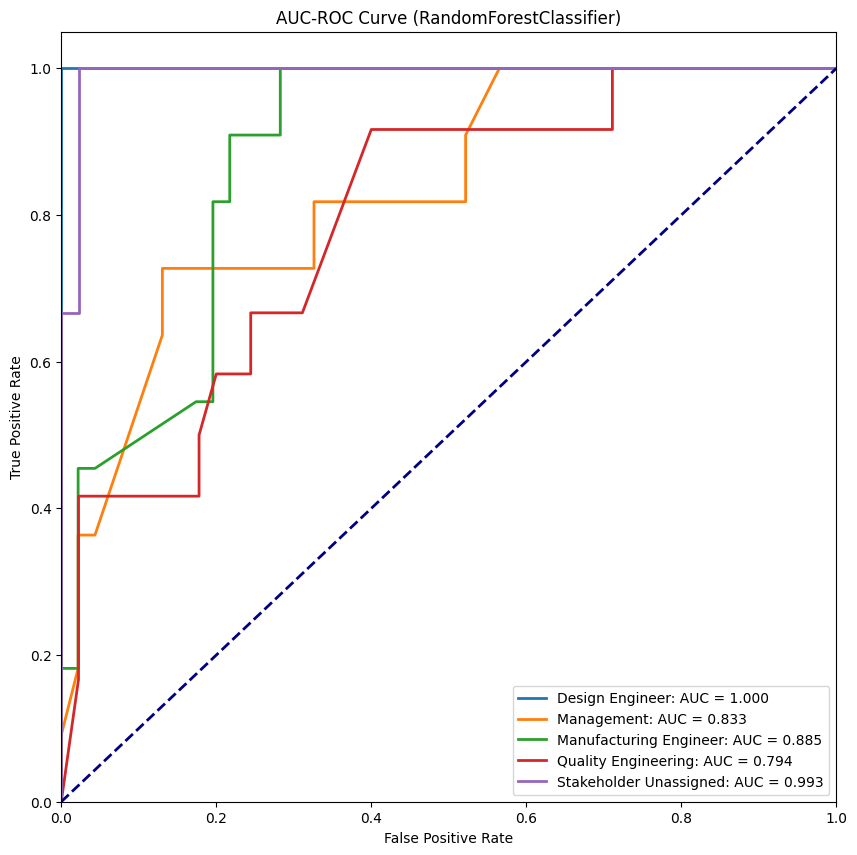

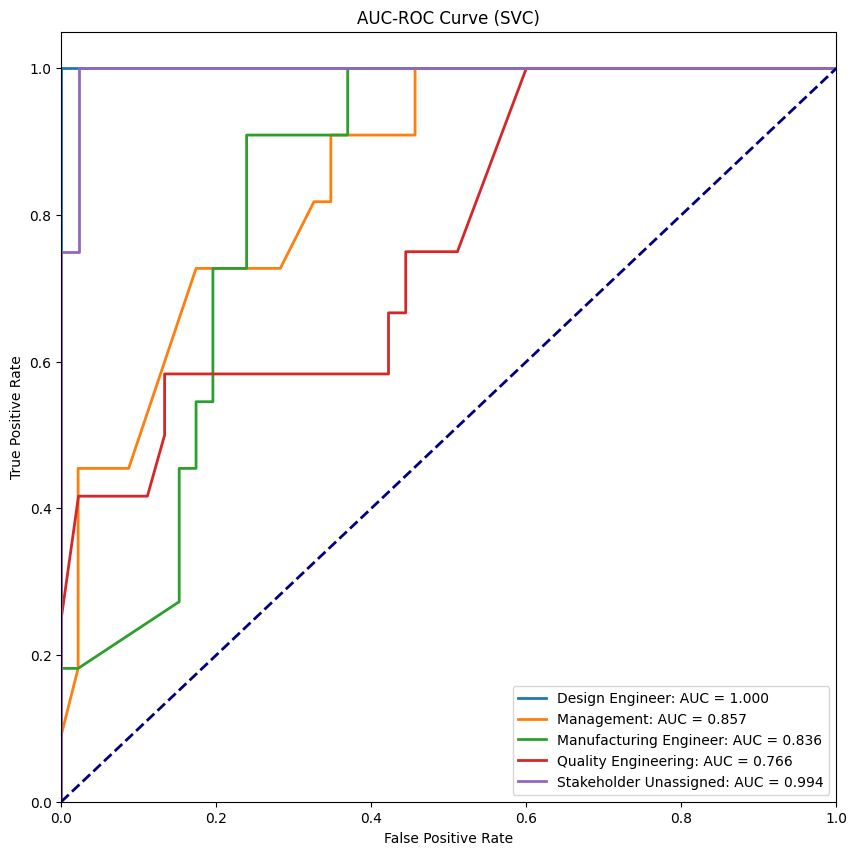

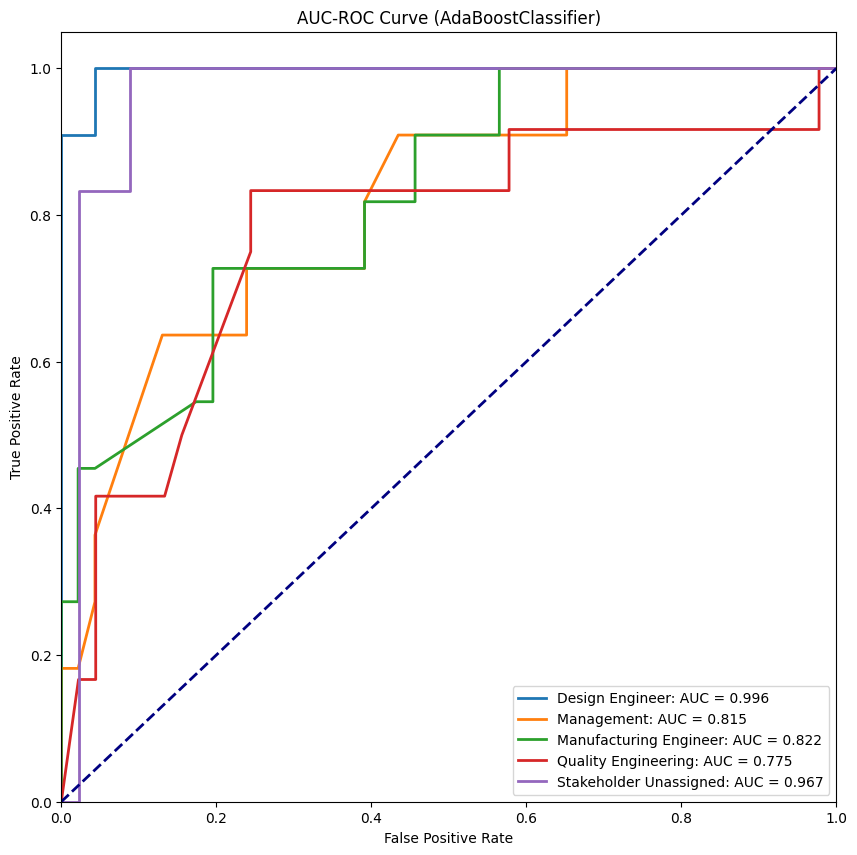

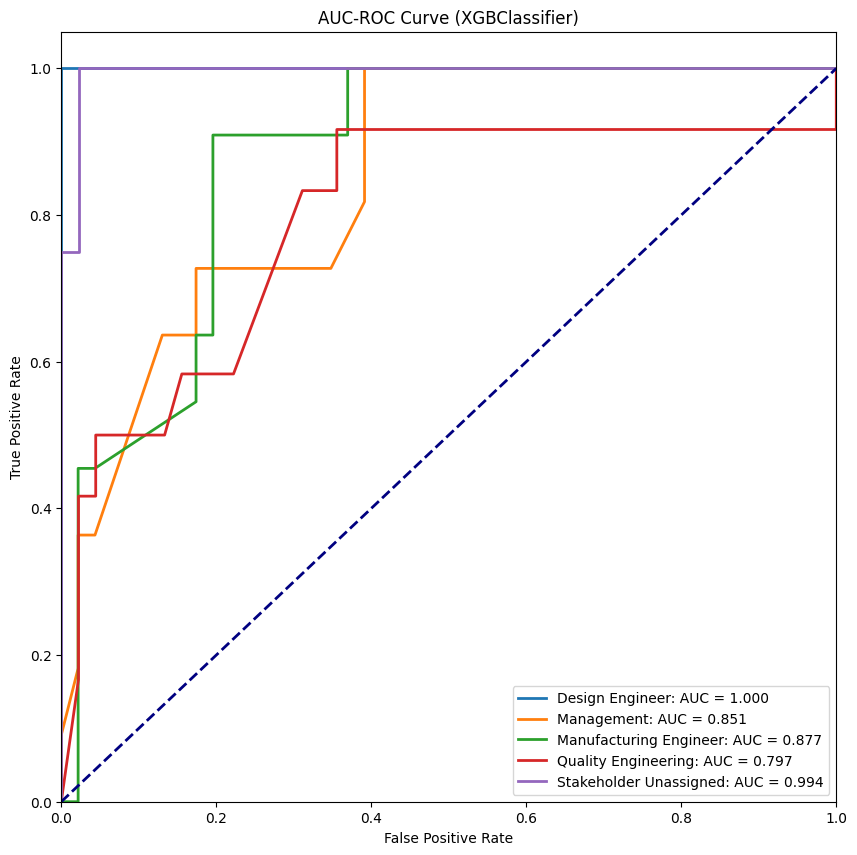

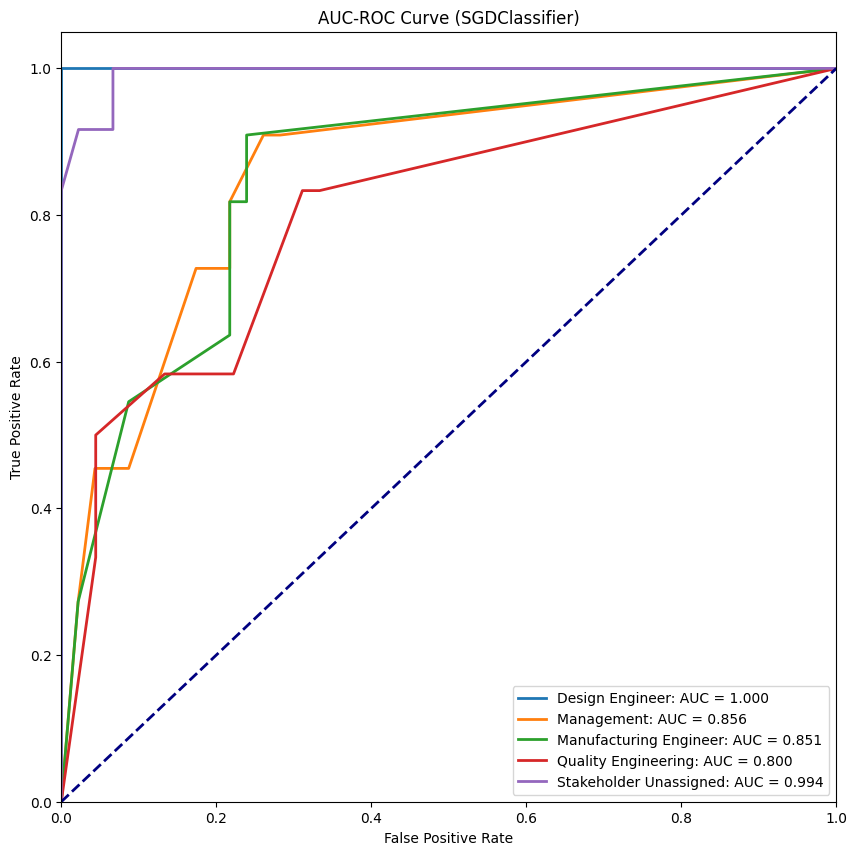

In [ ]:
for i in MODELS_OBJECT_UNDER:
  compute_AUC_ROC(i)

# **Models**

In [ ]:
print("Oversampling Results")
df_all_models

Oversampling Results


,Accuracy,Precision,Recall,F1,Training time (s)
Model,,,,,
LogisticRegression,81.4735,81.4779,83.5969,80.7383,0.777632
GaussianNB,63.1140,63.1220,64.9656,58.9244,0.077150
RandomForestClassifier,81.7835,81.7874,84.1478,81.3565,2.327621
SVC,83.0234,83.0259,84.1032,82.8634,44.715212
AdaBoostClassifier,79.2799,79.2823,79.0978,78.6981,21.655985
XGBClassifier,82.9518,82.9541,83.9812,82.8723,9.105487
SGDClassifier,80.1144,80.1117,83.3828,80.3557,4.382642


In [ ]:
df_obj_over =  pd.DataFrame(MODELS_OBJECT).T
df_obj_over.columns = ['LR', 'GNB', 'RF', 'SVM', 
                  'Adaboost', 'XGB', 'SGD']

df_obj_over                 

,LR,GNB,RF,SVM,Adaboost,XGB,SGD
0,"LogisticRegression(C=10, multi_class='ovr', ra...",GaussianNB(var_smoothing=1e-05),"(DecisionTreeClassifier(max_depth=10, max_feat...","SVC(C=10, probability=True, random_state=42)","(DecisionTreeClassifier(max_depth=5, random_st...","XGBClassifier(base_score=None, booster=None, c...","SGDClassifier(loss='modified_huber', penalty='..."


In [ ]:
print("Undersampling Results")
df_all_models_under

Undersampling Results


,Accuracy,Precision,Recall,F1,Training time (s)
Model,,,,,
LogisticRegression,70.1754,70.1515,72.1266,70.1771,0.006033
GaussianNB,61.4035,61.9697,55.9041,56.8072,0.003203
RandomForestClassifier,66.6667,66.5152,67.2191,65.6686,0.127206
SVC,70.1754,70.0000,70.5611,69.4763,0.035568
AdaBoostClassifier,64.9123,64.6970,65.0866,63.4273,0.360172
XGBClassifier,68.4211,68.1818,68.2900,67.0385,0.508749
SGDClassifier,70.1754,70.1515,72.6667,69.9977,0.045384


In [ ]:
df_obj_under =  pd.DataFrame(MODELS_OBJECT_UNDER).T
df_obj_under.columns = ['LR', 'GNB', 'RF', 'SVM', 
                  'Adaboost', 'XGB', 'SGD']

df_obj_under                 

,LR,GNB,RF,SVM,Adaboost,XGB,SGD
0,"LogisticRegression(C=10, multi_class='ovr', ra...",GaussianNB(var_smoothing=1e-05),"(DecisionTreeClassifier(max_depth=10, max_feat...","SVC(C=10, probability=True, random_state=42)","(DecisionTreeClassifier(max_depth=5, random_st...","XGBClassifier(base_score=None, booster=None, c...","SGDClassifier(loss='modified_huber', penalty='..."


## **Save Model**

In [ ]:
df_obj_over['SVM'].values[0]

SVC(C=10, probability=True, random_state=42)

In [ ]:
def save_pickle_model(model, model_name):
  import pickle
  # Save the model as a pickle file
  with open(f'{model_name}_model.pkl', 'wb') as file:
      pickle.dump(model, file)
  print(f"{model_name}_model.pkl saved.")

In [ ]:
def load_model(model_name):
  import pickle
  # Load the model from the pickle file
  with open(f'{model_name}', 'rb') as file:
      model = pickle.load(file)
  print("Model Loaded.")
  return model

In [ ]:
model_svm = df_obj_over['SVM'].values[0]
save_pickle_model(model_svm, 'SVM')
model = load_model("SVM_model.pkl")
model

SVM_model.pkl saved.
Model Loaded.


SVC(C=10, probability=True, random_state=42)

In [ ]:
model_xgb = df_obj_over['XGB'].values[0]
save_pickle_model(model_xgb, 'XGB')
model = load_model("XGB_model.pkl")
model

XGB_model.pkl saved.
Model Loaded.


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=5,
              num_parallel_tree=None, objective='multi:softmax', ...)